# Advance Regression Assignment

###### Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market.The company wants to know the following things about the prospective properties:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.


In [172]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [173]:
#Suppress warnings
import warnings
warnings.filterwarnings('ignore') 

In [174]:
# To display all the columns
pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows',50)

## Step1: Reading and Understanding data

In [175]:
# Read csv file
house_data =  pd.read_csv('train (1).csv')
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [176]:
house_data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

###### 1.1 Inspecting and Data cleaning

In [177]:
#Inspect data 
house_data.shape

(1460, 81)

In [178]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Inference: 
- Dataset contains many columns which is a mix of continuous and categorical columns
- Many columns have null values which has to be evaluated
- Dataset has year and month columns
- Numerical columns to be scaled and have to create encodings for categorical columns 

In [179]:
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [180]:
house_data.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

Inferences:
- id column can be dropped 
- Looks like many numerical columns have most values present as zeroes. Will handle this later

In [181]:
#Drop id column
house_data.drop(labels='Id',axis=1,inplace=True)

In [182]:
# Check for missing values
miss_cols=(house_data.isna().mean()[house_data.isna().mean()>0].sort_values(ascending=False)*100).index
house_data.isna().mean()[house_data.isna().mean()>0].sort_values(ascending=False)*100


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [183]:
#Check the categories and their presence in columns with missing values.
for cols in miss_cols:
    print(cols,':',house_data[cols].unique())
    print("___________________________________________________")

PoolQC : [nan 'Ex' 'Fa' 'Gd']
___________________________________________________
MiscFeature : [nan 'Shed' 'Gar2' 'Othr' 'TenC']
___________________________________________________
Alley : [nan 'Grvl' 'Pave']
___________________________________________________
Fence : [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
___________________________________________________
FireplaceQu : [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
___________________________________________________
LotFrontage : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182

As per the data dictionary nan values of below features represent None

PoolQC,MiscFeature,Alley,Fence,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,
BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual

These nan values has to be replaced with None

In [184]:
miss_cols=miss_cols.to_list()

In [185]:
len(miss_cols)

19

In [186]:
# Remove missing value cols from miss_cols and check the length
miss_cols.remove('LotFrontage')
miss_cols.remove('GarageYrBlt')
miss_cols.remove('MasVnrArea')
miss_cols.remove('MasVnrType')
miss_cols.remove('Electrical')
len(miss_cols)

14

In [187]:
# Fill Na values as None for those columns which has a meaning for Nan
house_data[miss_cols] = house_data[miss_cols].fillna(value='None')


In [188]:
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  None      Reg   
1          20       RL         80.0     9600   Pave  None      Reg   
2          60       RL         68.0    11250   Pave  None      IR1   
3          70       RL         60.0     9550   Pave  None      IR1   
4          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [189]:
#Recheck the missing values
miss_val_cols = house_data.isnull().mean()[house_data.isnull().mean()>0].sort_values(ascending =False).index
house_data.isnull().mean()[house_data.isnull().mean()>0].sort_values(ascending =False)*100

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [190]:
# Stroring missing value columns
miss_val_cols=miss_val_cols.to_list()


In [191]:
house_data[miss_val_cols].head()

LotFrontage  GarageYrBlt MasVnrType  MasVnrArea Electrical
0         65.0       2003.0    BrkFace       196.0      SBrkr
1         80.0       1976.0       None         0.0      SBrkr
2         68.0       2001.0    BrkFace       162.0      SBrkr
3         60.0       1998.0       None         0.0      SBrkr
4         84.0       2000.0    BrkFace       350.0      SBrkr

In [192]:
# Checking for duplicate rows
house_data[house_data.duplicated()== True]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

There are no duplicate rows present in the data.

In [193]:
# Creating a lists of categorical and numerical columns
numcols = house_data.select_dtypes(include=np.number).columns
catcols = house_data.select_dtypes(include= 'object').columns

In [194]:
#Check the categories and their presence in each of object type columns
for cols in catcols:
    print(house_data[cols].value_counts(normalize=True)*100)
    print("___________________________________________________")

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
___________________________________________________
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
___________________________________________________
None    93.767123
Grvl     3.424658
Pave     2.808219
Name: Alley, dtype: float64
___________________________________________________
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
___________________________________________________
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
___________________________________________________
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
___________________________________________________
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: flo

Inferences:
 Below mentioned variables can be removed from dataset as they have very less variability.
- Street has 99.5% values as Pave
- Utilities  has 99% values as AllPub
- Condition2 has 98.97% values as Norm
- RoofMatl has 98.2% values as CompShg
- Heating has 97.8% values as GasA
- PoolQC has 99.5% values as None

 Other points:
- MSZoning has a category C (all), which is to be renamed as 'C'. Renaming as per the data dictionary
- ExterQual,ExterCond,KitchenQual,BsmtQual,BsmtCond,GarageQual,GarageCond,HeatingQC,BsmtExposure must be label encoded as the categories are ordinal.



In [195]:
# Removing variables that have less variance in data, in term of the presence of categories.
house_data.drop(labels=['Street','Utilities','Condition2','RoofMatl','Heating','PoolQC'],axis=1,inplace=True)

In [196]:
catcols = house_data.select_dtypes(include= 'object').columns
catcols

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [197]:
# Renaming category of MSZoing
house_data.MSZoning = house_data.MSZoning.apply(lambda x: 'C' if x=='C (all)' else x)
house_data.MSZoning.value_counts(normalize=True)

RL    0.788356
RM    0.149315
FV    0.044521
RH    0.010959
C     0.006849
Name: MSZoning, dtype: float64

In [198]:
numcols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [199]:
#Check for discrete numeric columns
disnumcols=[]
for cols in numcols:
    val=len(house_data[cols].unique())
    if val<21:
        print(cols+':',val)
        disnumcols.append(cols)


MSSubClass: 15
OverallQual: 10
OverallCond: 9
BsmtFullBath: 4
BsmtHalfBath: 3
FullBath: 4
HalfBath: 3
BedroomAbvGr: 8
KitchenAbvGr: 4
TotRmsAbvGrd: 12
Fireplaces: 4
GarageCars: 5
3SsnPorch: 20
PoolArea: 8
MoSold: 12
YrSold: 5


In [200]:
for cols in disnumcols:
    print(house_data[cols].value_counts(normalize=True)*100)
    print("___________________________________________________")

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
___________________________________________________
5     27.191781
6     25.616438
7     21.849315
8     11.506849
4      7.945205
9      2.945205
3      1.369863
10     1.232877
2      0.205479
1      0.136986
Name: OverallQual, dtype: float64
___________________________________________________
5    56.232877
6    17.260274
7    14.041096
8     4.931507
4     3.904110
3     1.712329
9     1.506849
2     0.342466
1     0.068493
Name: OverallCond, dtype: float64
___________________________________________________
0    58.630137
1    40.273973
2     1.027397
3     0.068493
Name: BsmtFullBath, dtype: float64
___________________________________________________
0    94.383562
1     5.479452
2     0.136986
N

Inferences:
- Except 2 columns PoolArea and 3SsnPorch, rest all represent either count or an ordinal feature.
- MSSubClass - It represents the type of dwelling and values given for each category seem to have some order based on the importance of each category.
- YrSold and MoSold to be used to calculate number of years from which the house has been sold.
- 99% of PoolArea has value 0. It will be better to drop this feature.
- More than 98% of 3SsnPorch has value 0. It will be better to drop this feature due to less variance.

In [201]:
#Drop 'PoolArea' and '3SsnPorch' due to less variance in data
house_data.drop(labels=['PoolArea','3SsnPorch'],axis=1,inplace=True)

In [202]:
numcols = house_data.select_dtypes(include=np.number).columns
numcols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')

In [203]:
disnumcols.remove('3SsnPorch')
disnumcols.remove('PoolArea')

In [204]:
contcol=list(set(numcols)-set(disnumcols))
contcol

['1stFlrSF',
 'EnclosedPorch',
 'OpenPorchSF',
 'GarageArea',
 'SalePrice',
 'GarageYrBlt',
 'WoodDeckSF',
 'TotalBsmtSF',
 'MiscVal',
 'LowQualFinSF',
 'ScreenPorch',
 'BsmtFinSF1',
 'YearBuilt',
 'MasVnrArea',
 'GrLivArea',
 'YearRemodAdd',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LotFrontage',
 'LotArea']

###### 1.2 Univariate analysis

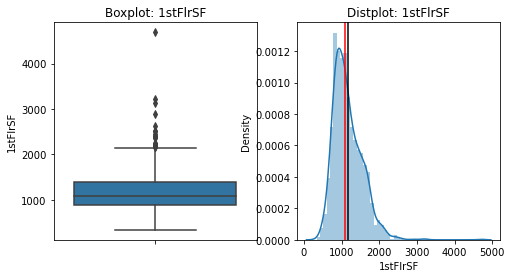

Skewness 1.3767566220336365
Kurtosis 5.74584148244079
----------------------------------------------------------------------


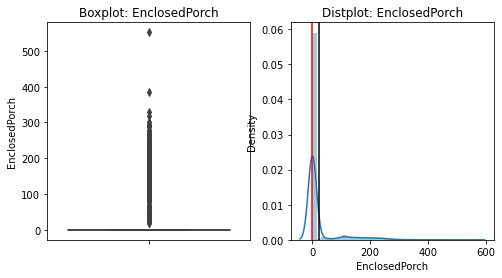

Skewness 3.08987190371177
Kurtosis 10.430765944030428
----------------------------------------------------------------------


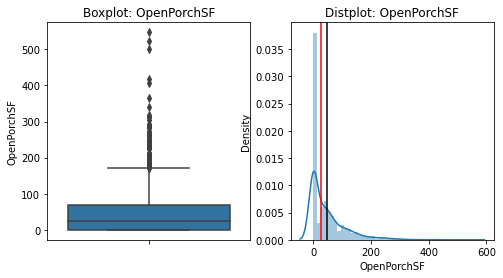

Skewness 2.3643417403694404
Kurtosis 8.490335805910506
----------------------------------------------------------------------


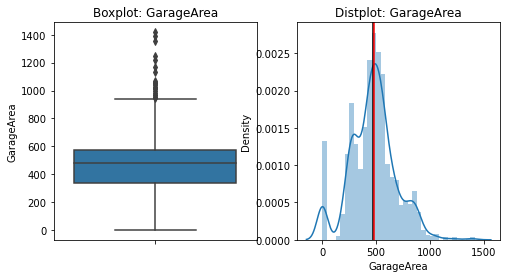

Skewness 0.17998090674623907
Kurtosis 0.9170672022708684
----------------------------------------------------------------------


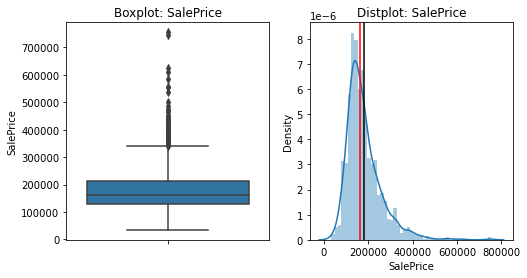

Skewness 1.8828757597682129
Kurtosis 6.536281860064529
----------------------------------------------------------------------


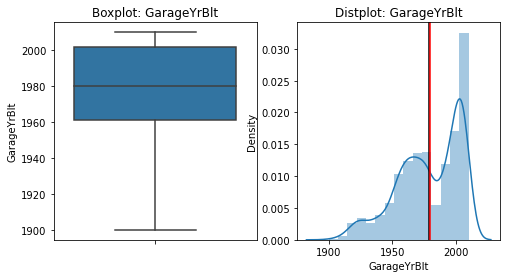

Skewness -0.6494146238714679
Kurtosis -0.4183409979729644
----------------------------------------------------------------------


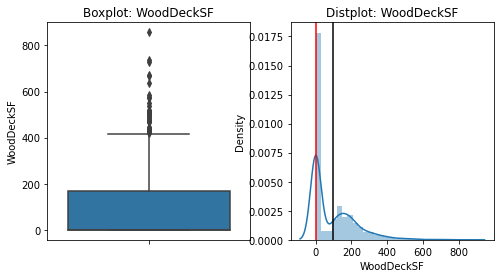

Skewness 1.5413757571931312
Kurtosis 2.992950924703908
----------------------------------------------------------------------


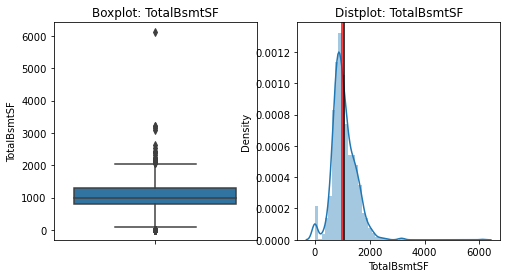

Skewness 1.5242545490627664
Kurtosis 13.250483281984796
----------------------------------------------------------------------


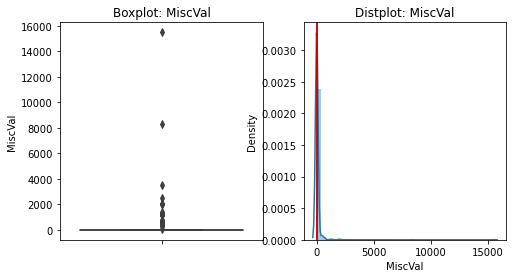

Skewness 24.476794188821916
Kurtosis 701.0033422801193
----------------------------------------------------------------------


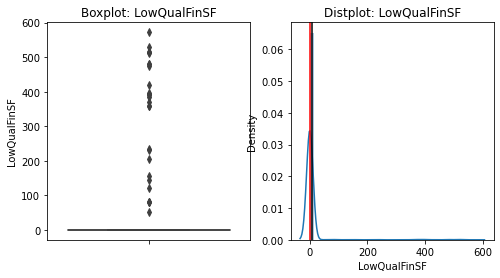

Skewness 9.011341288465387
Kurtosis 83.2348166744174
----------------------------------------------------------------------


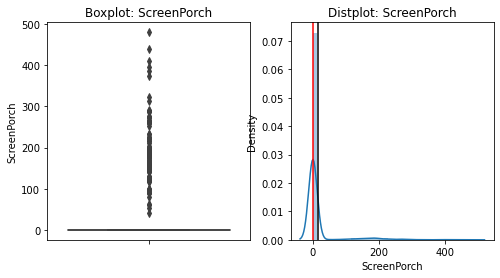

Skewness 4.122213743143115
Kurtosis 18.43906784486968
----------------------------------------------------------------------


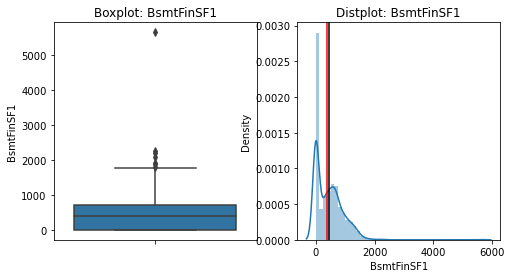

Skewness 1.685503071910789
Kurtosis 11.118236291964712
----------------------------------------------------------------------


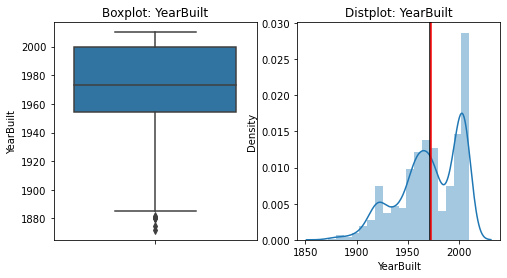

Skewness -0.613461172488183
Kurtosis -0.43955194159361977
----------------------------------------------------------------------


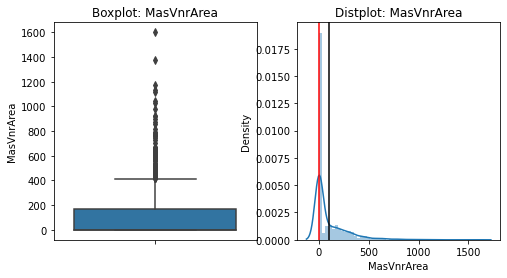

Skewness 2.669084210182863
Kurtosis 10.08241731736711
----------------------------------------------------------------------


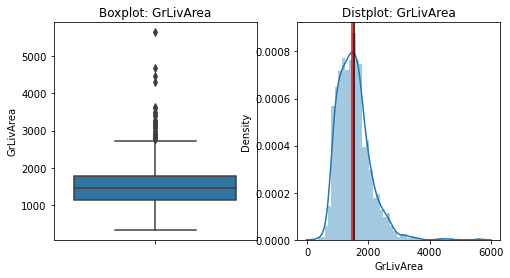

Skewness 1.3665603560164552
Kurtosis 4.895120580693174
----------------------------------------------------------------------


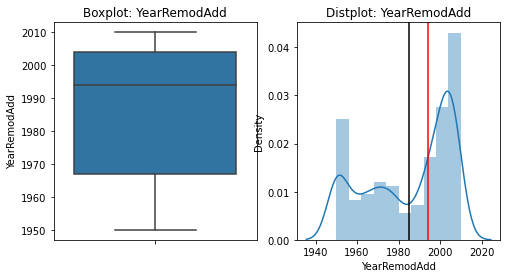

Skewness -0.5035620027004709
Kurtosis -1.2722451924732956
----------------------------------------------------------------------


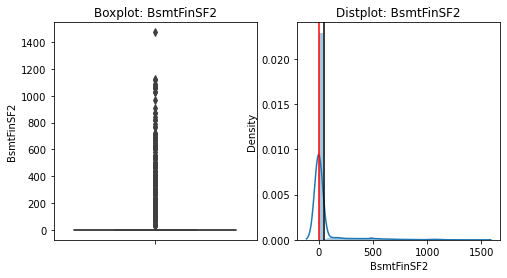

Skewness 4.255261108933303
Kurtosis 20.11333754558646
----------------------------------------------------------------------


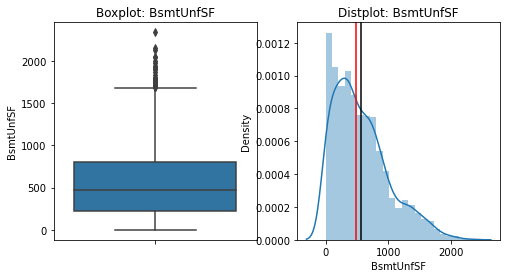

Skewness 0.9202684528039037
Kurtosis 0.47499398780908475
----------------------------------------------------------------------


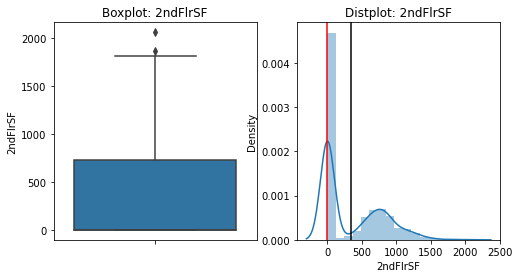

Skewness 0.8130298163023265
Kurtosis -0.5534635576075795
----------------------------------------------------------------------


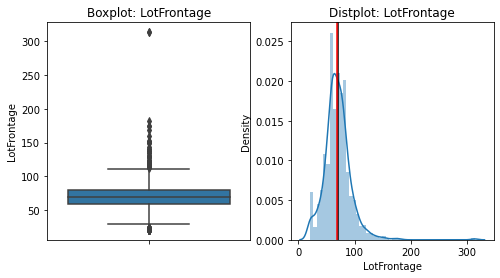

Skewness 2.163569142324884
Kurtosis 17.452867259818404
----------------------------------------------------------------------


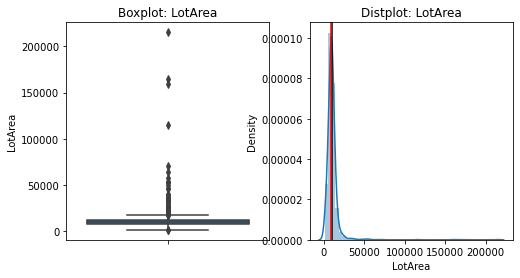

Skewness 12.207687851233496
Kurtosis 203.24327101886033
----------------------------------------------------------------------


In [205]:
#plotting boxplot and distplot for continuous numeric variables

for cols in contcol:
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.title(f'Boxplot: {cols}')
    sns.boxplot(y=cols,data=house_data)
    plt.subplot(1,2,2)
    plt.title(f'Distplot: {cols}')
    sns.distplot(house_data[cols])
    plt.axvline(house_data[cols].mean(), c="black")
    plt.axvline(house_data[cols].median(), c="red")
    plt.show()
    print("Skewness",house_data[cols].skew())
    print("Kurtosis",house_data[cols].kurt())
    print('-'*70)

Inferences:
- Response variable SalePrice has a skewed distribution and it has outlier values after 700000
- Most of the predictor variables have a heavily skewed distribution.
- 1stFlrSF, ScreenPorch,BsmtFinSF1,TotalBsmtSF,LotFrontage(after 250),OpenPorchSF,GarageArea, GrLivArea,LotArea has outlier values
- ScreenPorch,2ndFlrSF,MasVnrArea,WoodDeckSF,BsmtFinSF1,LowQualFinSF,MiscVal,BsmtFinSF2,EnclosedPorch has most values as zero. They can not be considered as outlier as zeroe indicates zero area. For example a house can have or not have a wooddeck. If it's not there in a house, the area will be zeroe for that cell.

In [206]:
#Check quantiles for SalePrice and other columns having outlier values
for cols in ['1stFlrSF', 'ScreenPorch','BsmtFinSF1','TotalBsmtSF','LotFrontage','OpenPorchSF','GarageArea',
             'GrLivArea','LotArea' ]:
    print(house_data[cols].quantile([0.5,.75,0.95,0.99,0.99999,1]))

0.50000    1087.00000
0.75000    1391.25000
0.95000    1831.25000
0.99000    2219.46000
0.99999    4670.64024
1.00000    4692.00000
Name: 1stFlrSF, dtype: float64
0.50000      0.0000
0.75000      0.0000
0.95000    160.0000
0.99000    268.0500
0.99999    479.4164
1.00000    480.0000
Name: ScreenPorch, dtype: float64
0.50000     383.50000
0.75000     712.25000
0.95000    1274.00000
0.99000    1572.41000
0.99999    5594.62744
1.00000    5644.00000
Name: BsmtFinSF1, dtype: float64
0.50000     991.50000
0.75000    1298.25000
0.95000    1753.00000
0.99000    2155.05000
0.99999    6067.63064
1.00000    6110.00000
Name: TotalBsmtSF, dtype: float64
0.50000     69.0
0.75000     80.0
0.95000    107.0
0.99000    141.0
0.99999    313.0
1.00000    313.0
Name: LotFrontage, dtype: float64
0.50000     25.00000
0.75000     68.00000
0.95000    175.05000
0.99000    285.82000
0.99999    546.64984
1.00000    547.00000
Name: OpenPorchSF, dtype: float64
0.50000     480.00000
0.75000     576.00000
0.95000     

There is no considerable outlier values

###### 1.2 Bivariate Analysis

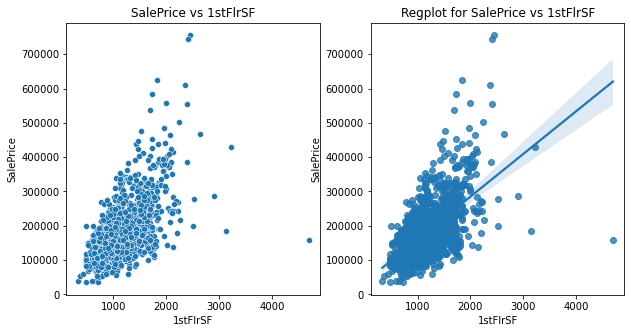

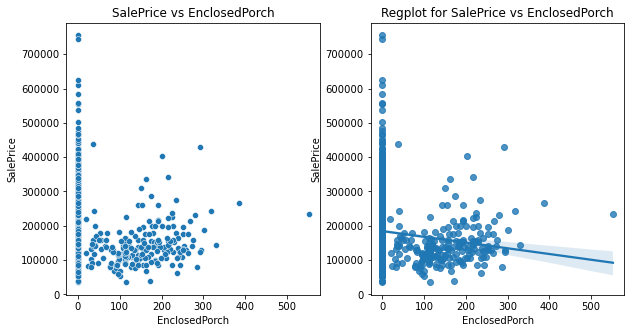

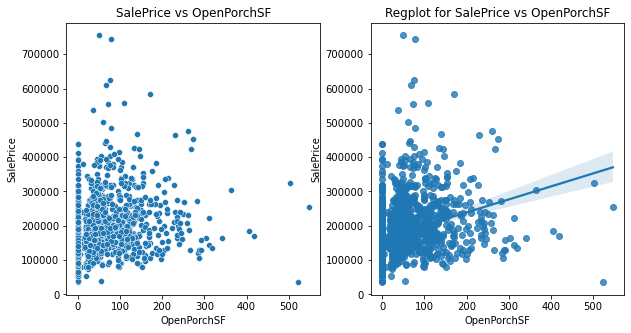

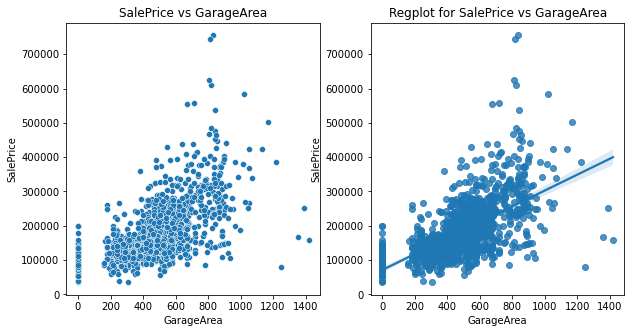

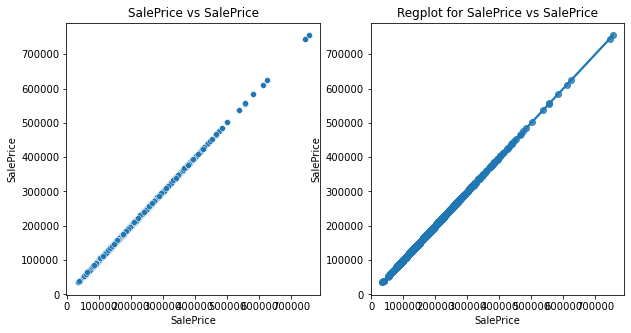

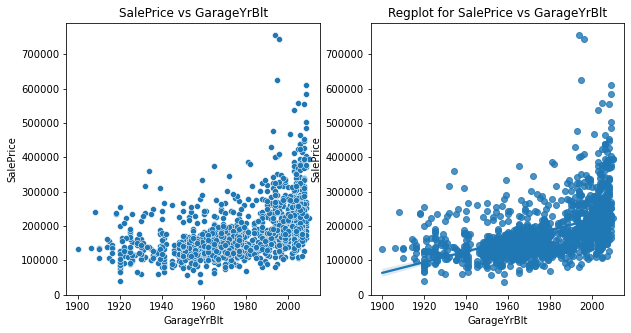

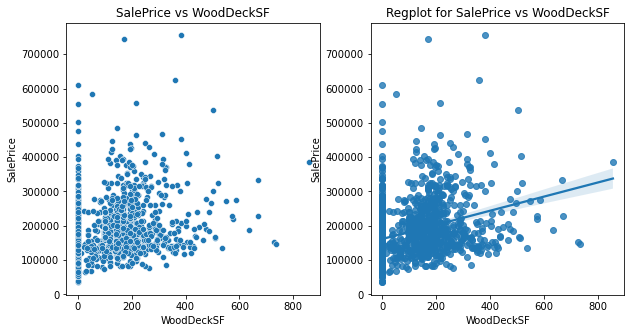

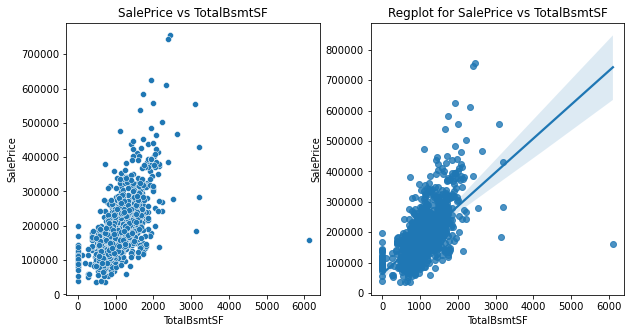

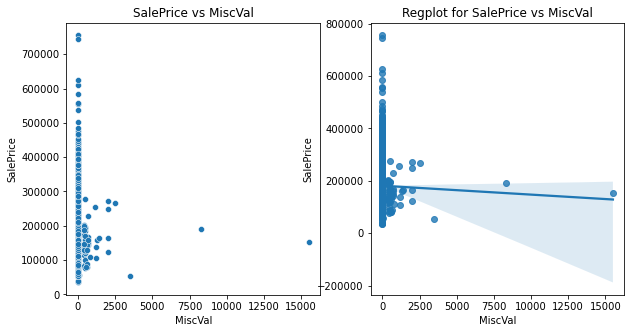

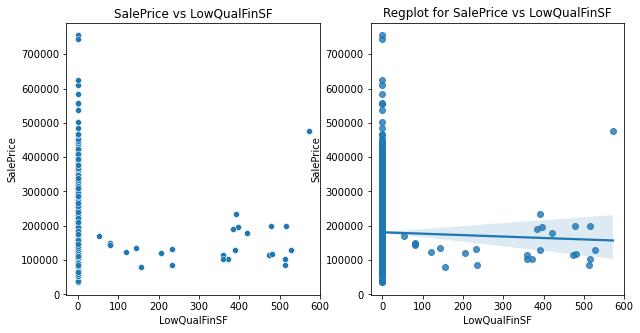

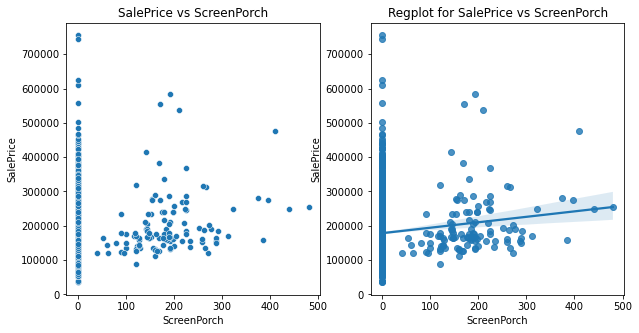

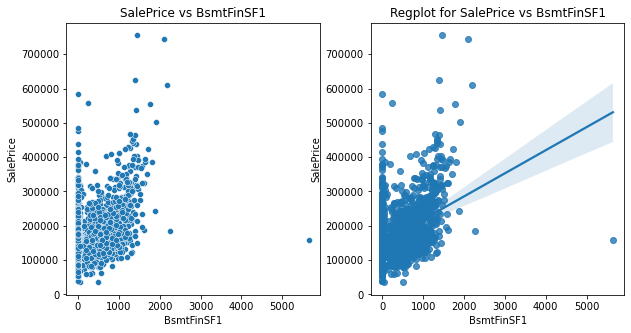

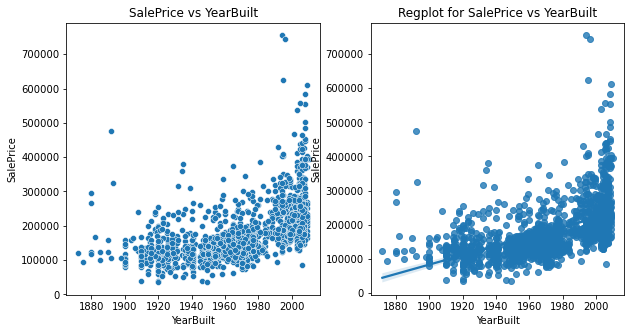

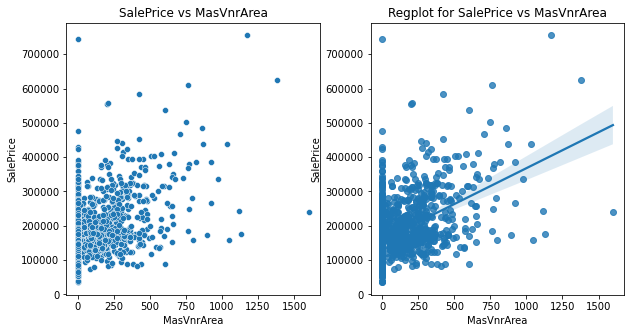

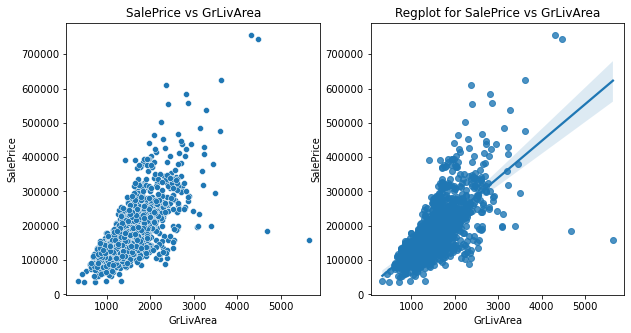

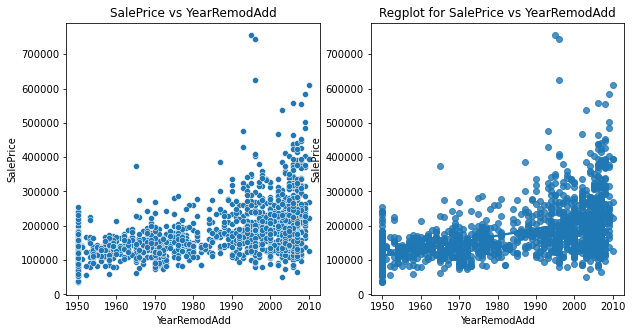

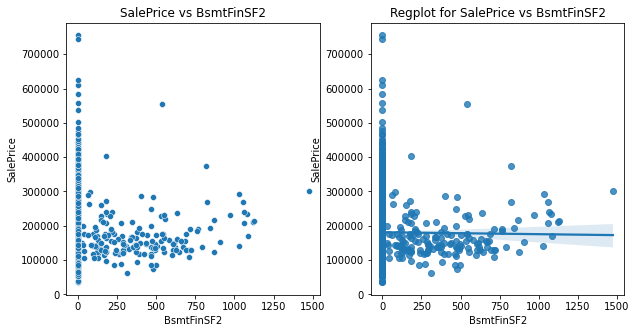

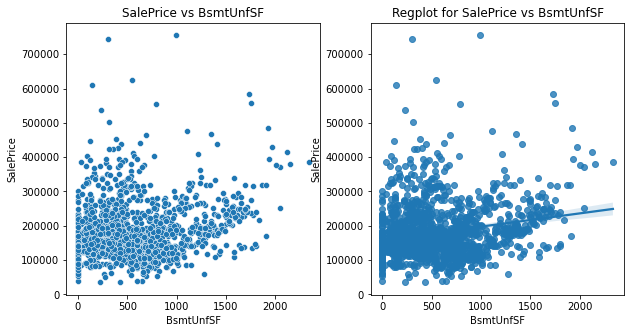

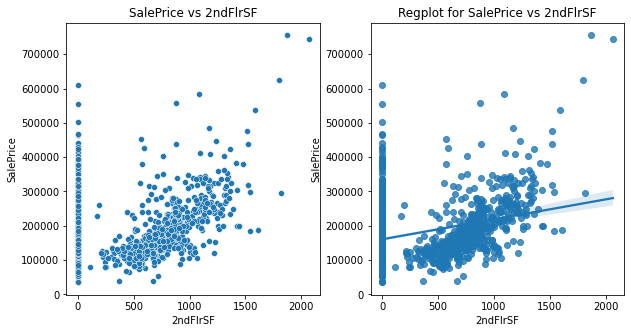

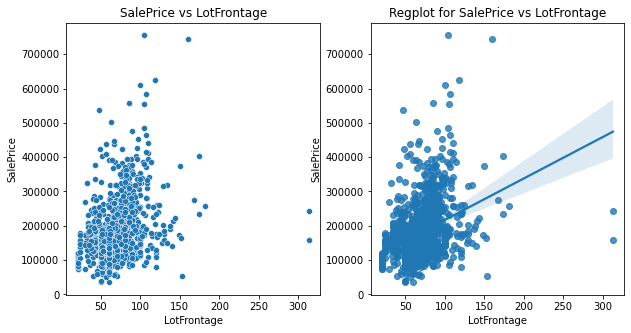

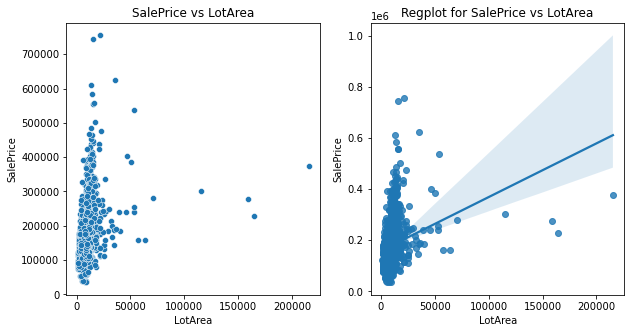

In [207]:
# Analyse relation between continuous variables and SalePrice using scatter plot
# second plot is a regplot which tries to fit a line through the plot
for cols in contcol:
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.title(f'SalePrice vs {cols}')
    sns.scatterplot(x=cols,y='SalePrice',data=house_data,palette='muted')
    plt.subplot(1,2,2)
    plt.title(f'Regplot for SalePrice vs {cols}')
    sns.regplot(x=cols,y='SalePrice',data=house_data)
    #plt.subplot(2,2,3)
    #plt.title(f'SalePrice vs log transform of {cols}')
    #sns.scatterplot(x=np.log(house_data[cols]),y=house_data.SalePrice,palette='muted')

    #plt.ylim(0,800000)
    plt.show()

Inferences:
 - YearBuilt,1stFlrSF , 2ndFlrSF,BsmtFinSF1,TotalBsmtSF,LotFrontage,OpenPorchSF, GarageArea GrLivArea, LotArea has a linear relationship with SalePrice. Among them YearBuilt,GarageArea GrLivArea,TotalBsmtSF plots show a stronger linear relationship.
 - As many predictor features have linear relationship with SalePrice, we can build a linear regression model for this business problem.
 

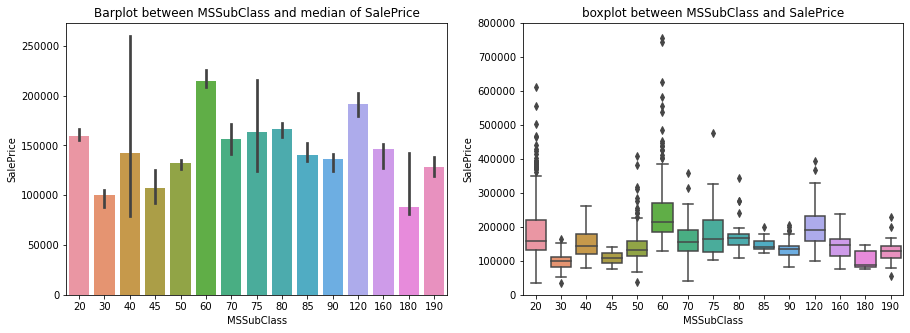

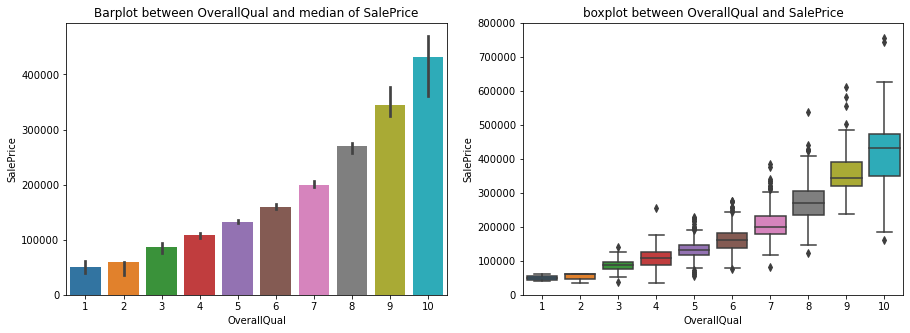

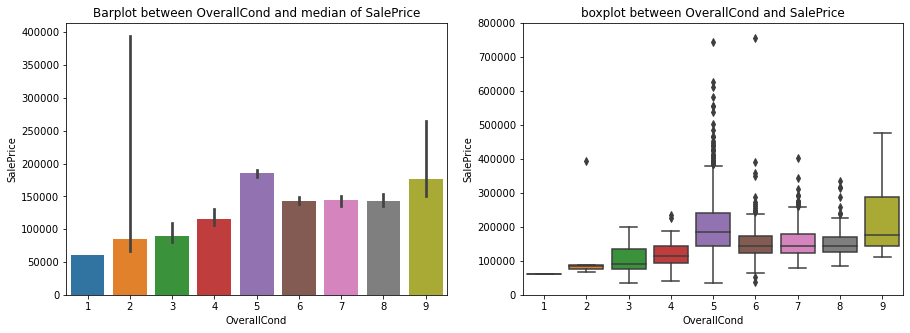

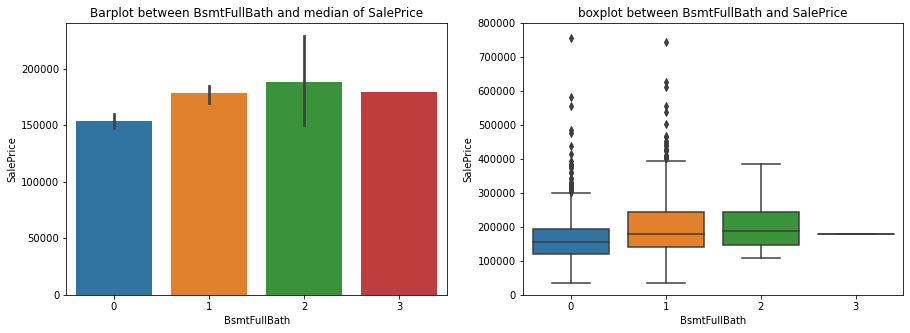

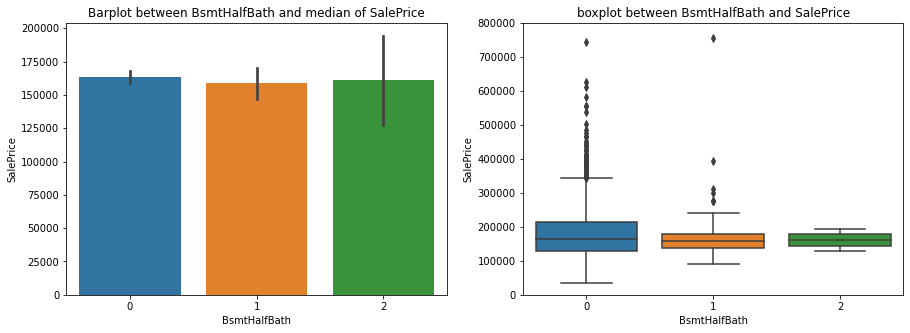

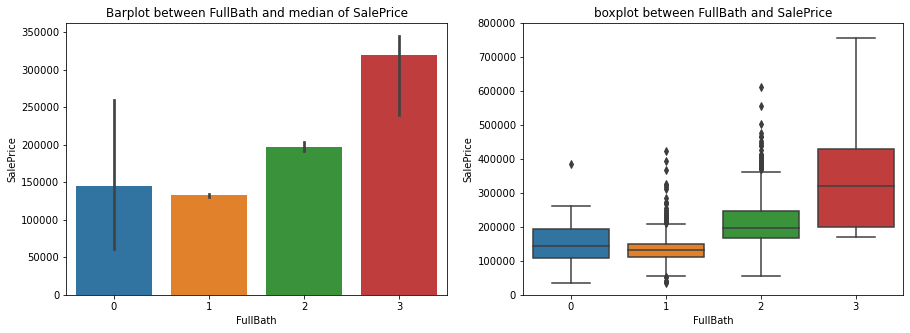

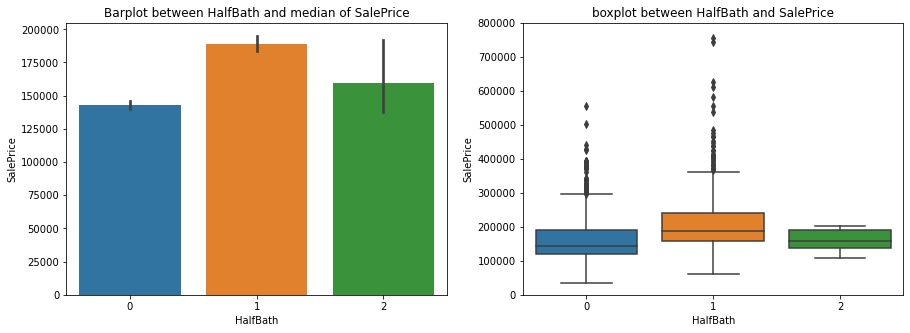

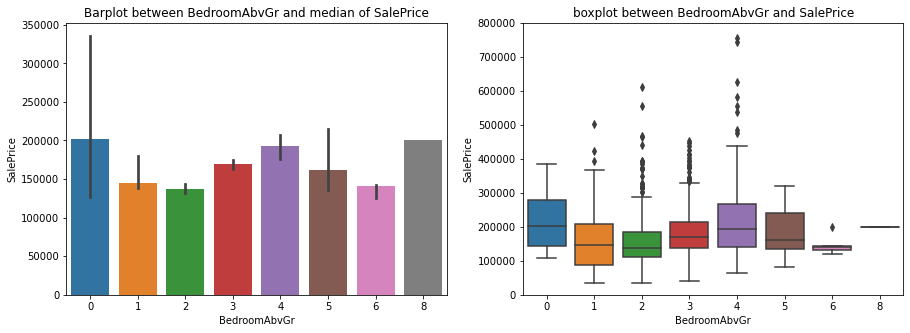

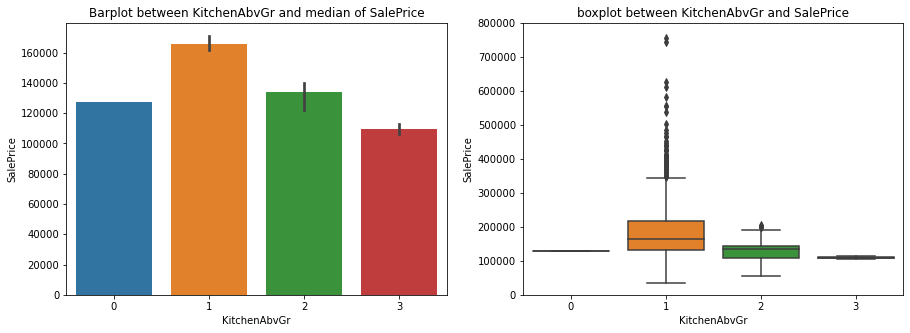

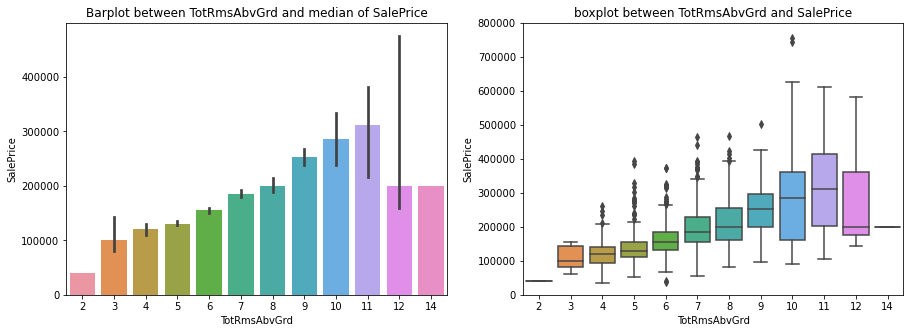

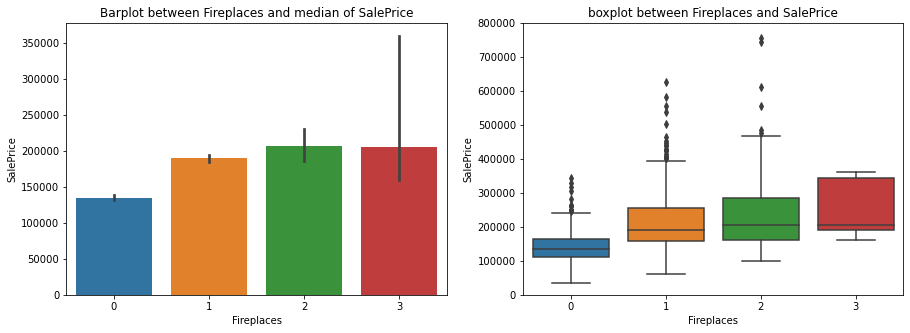

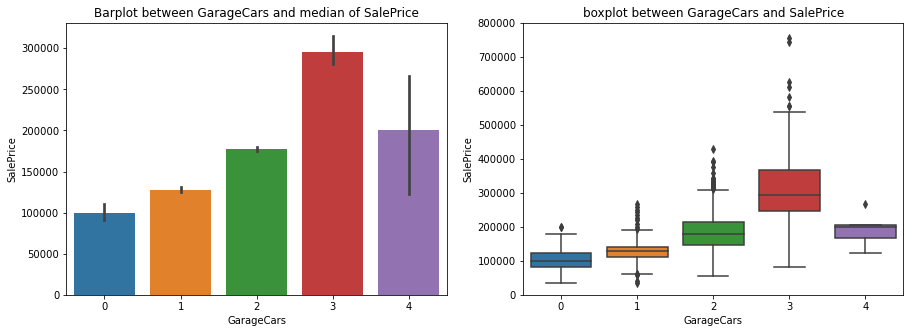

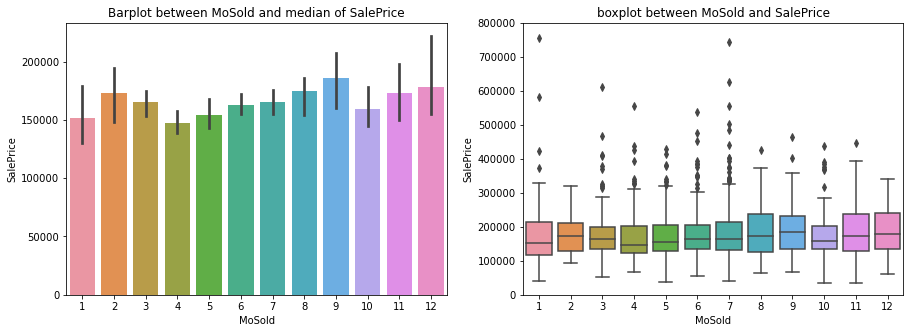

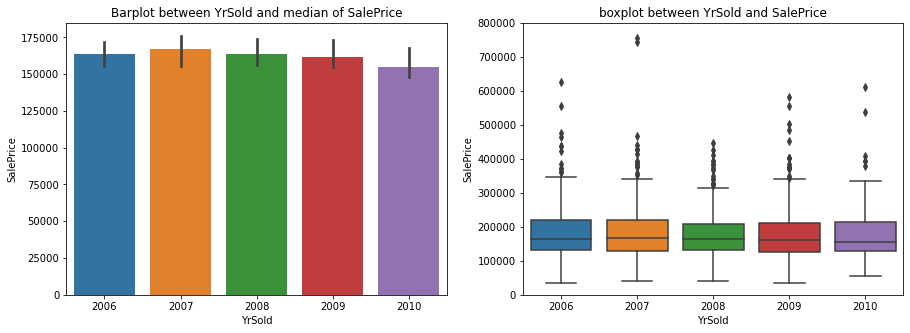

In [208]:
# Analyse relation between discerete continuous variables SalePrice using barplot and boxplot
# As SalePrice is having a skewed distribution, plotting the relationship using both median
for cols in disnumcols:
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    #plt.title(f'Barplot between {cols} and mean of SalePrice')
    #sns.barplot(x=cols,y='SalePrice',data=house_data)
    plt.title(f'Barplot between {cols} and median of SalePrice')
    sns.barplot(x=cols,y='SalePrice',data=house_data,estimator=np.median)
    plt.subplot(1,2,2)
    plt.title(f'boxplot between {cols} and SalePrice')
    sns.boxplot(data = house_data, x=cols,y='SalePrice')
    plt.ylim(0,800000)
    plt.show()

Inferences:
- As OverallQual increases, SalePrice increases
- SalePrice increases as TotRmsAbvGrd increases till 11 rooms, then the median price is lower than 8 rooms.
- MSSubClass 60 indicating 2-STORY 1946 & NEWER houses is having higher SalePrice
- Fireplaces has a linear relationship with the SalePrice
- MoSold and YrSold is not having any particular relationship with SalePrice

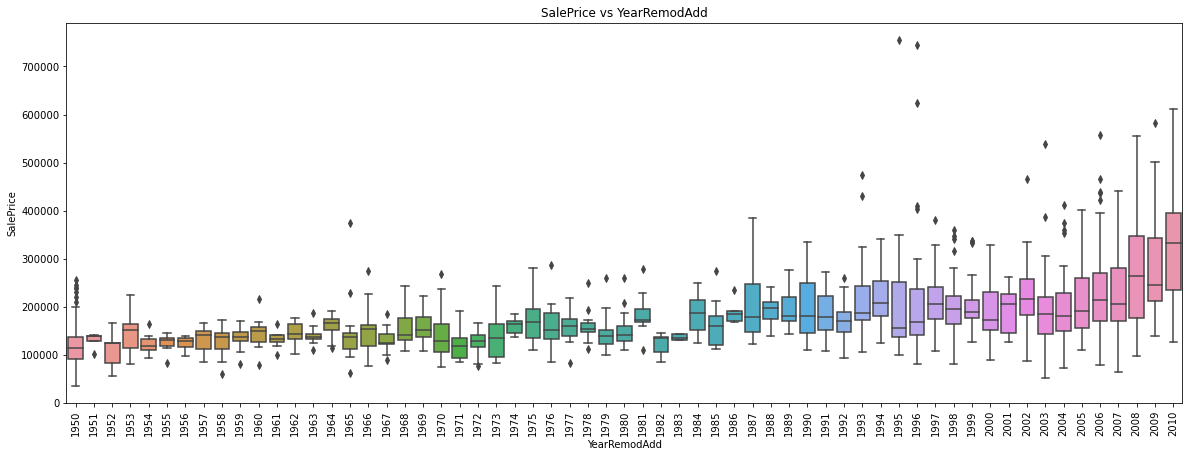

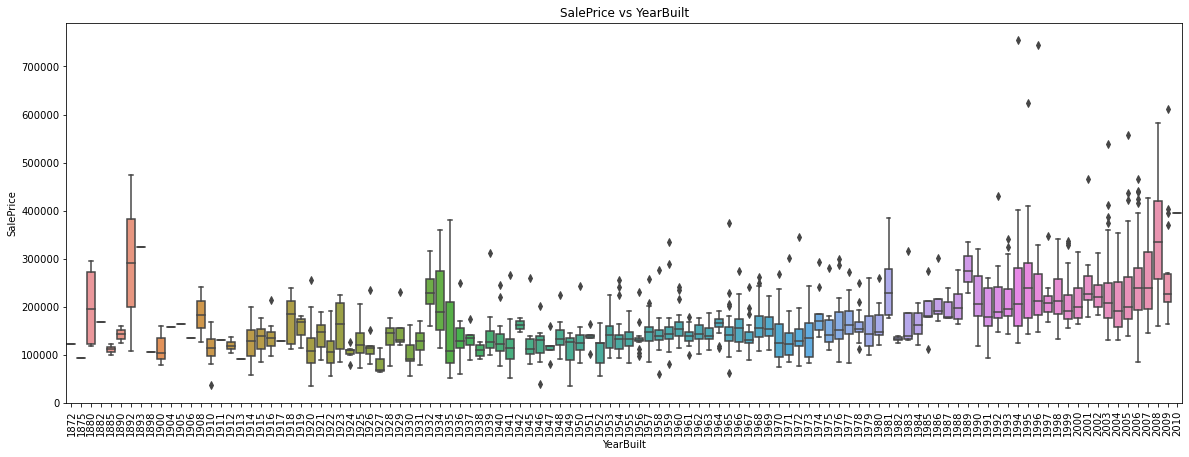

In [209]:
# Check boxplot for YearRemodAdd, YearBuilt and SalePrice
for col in ['YearRemodAdd','YearBuilt']:
    
    plt.figure(figsize=(20,7))
    plt.xticks(rotation=90)
    sns.boxplot(data = house_data, x=col,y='SalePrice')
    plt.title(f'SalePrice vs {col}' )
    plt.show()

Inferences:
- Boxplot of Remodelling year shows a nonlinear relation with the SalePrice. The price goes up and then goes down over the years and in two thousands, the price is increasing gradually.
- YearBuilt is also showing a similar relation like YearRemodAdd.
- In particular, house prices are high for the year 1892 and then it is high in 2008.

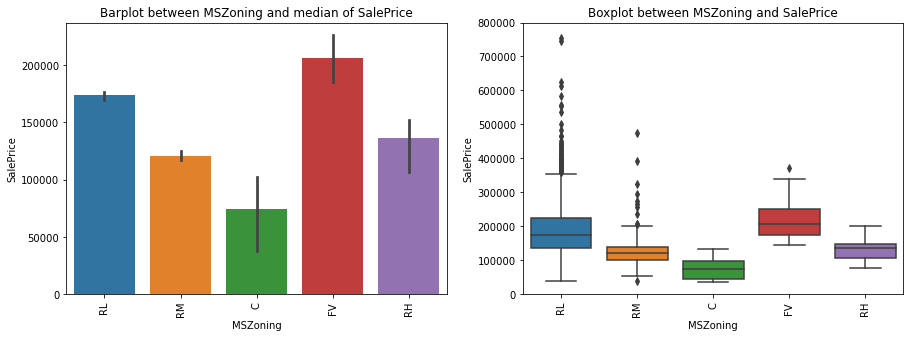

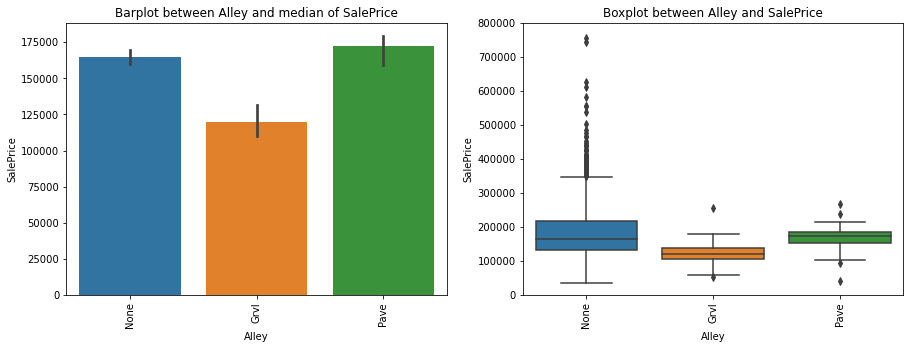

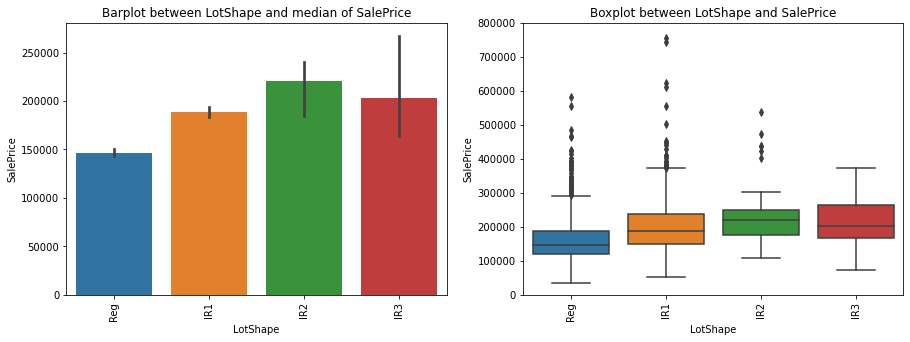

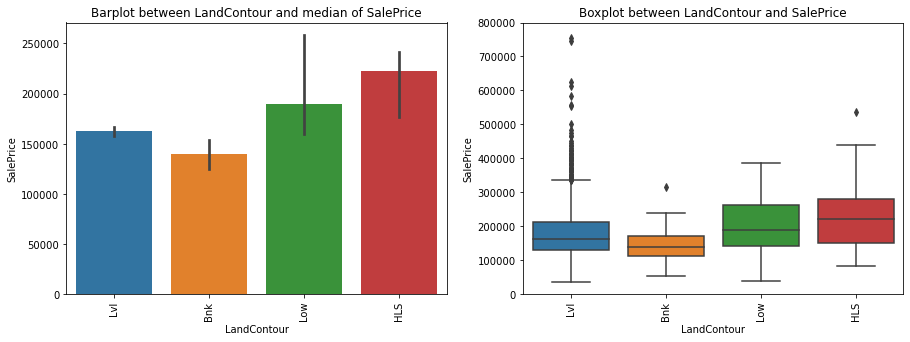

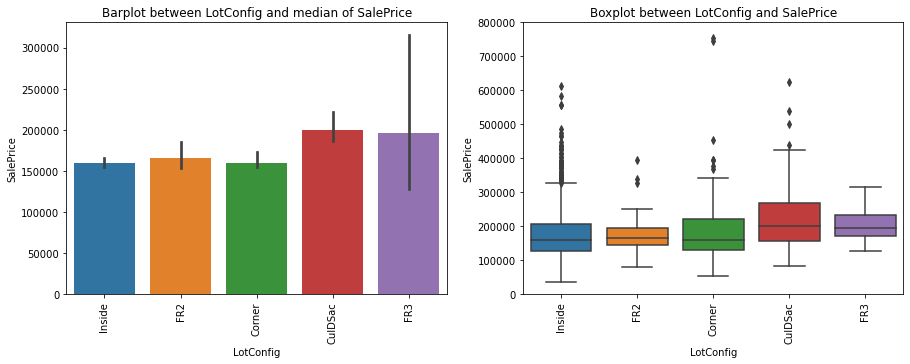

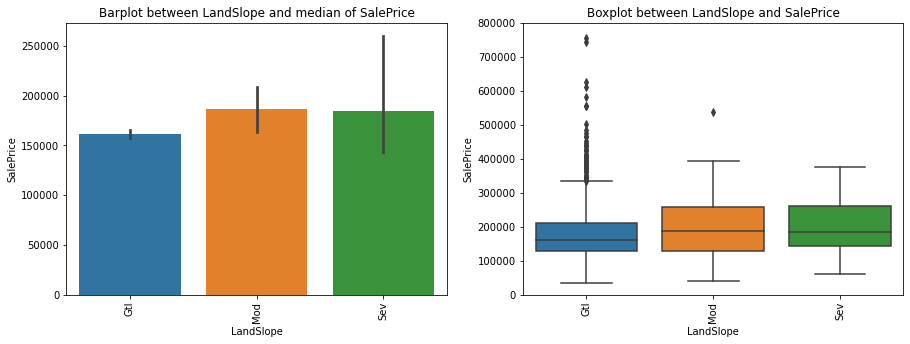

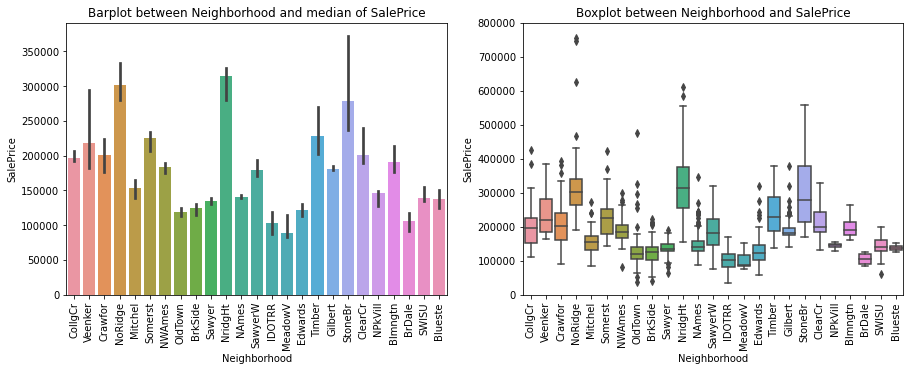

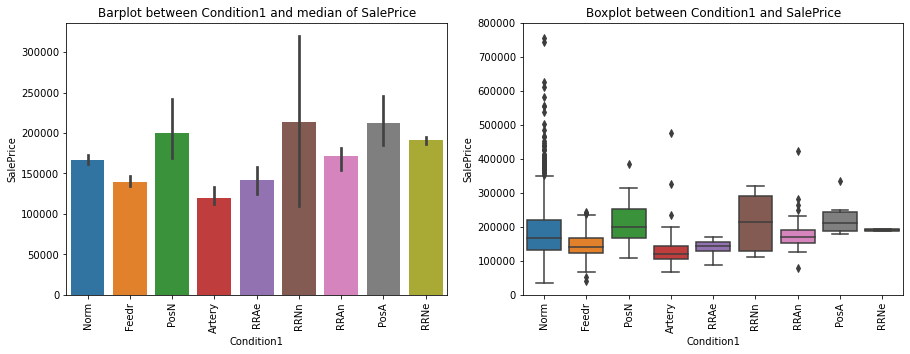

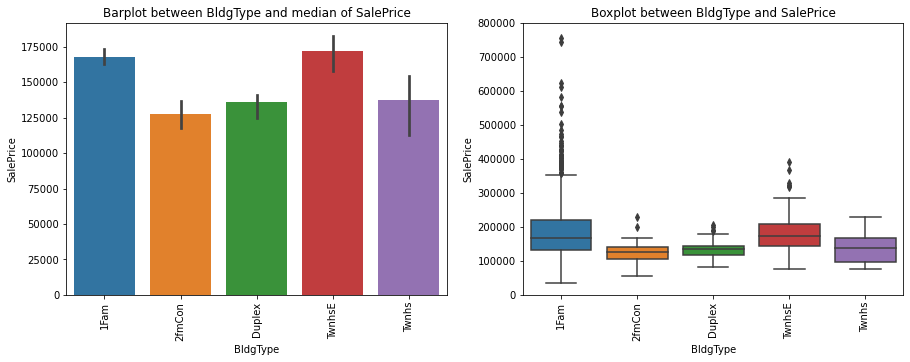

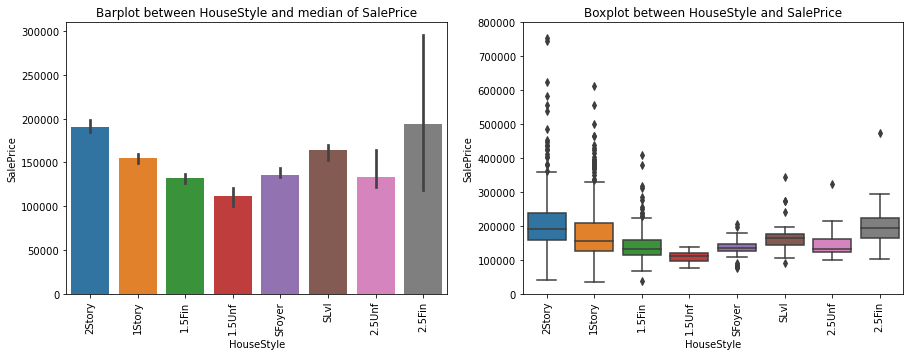

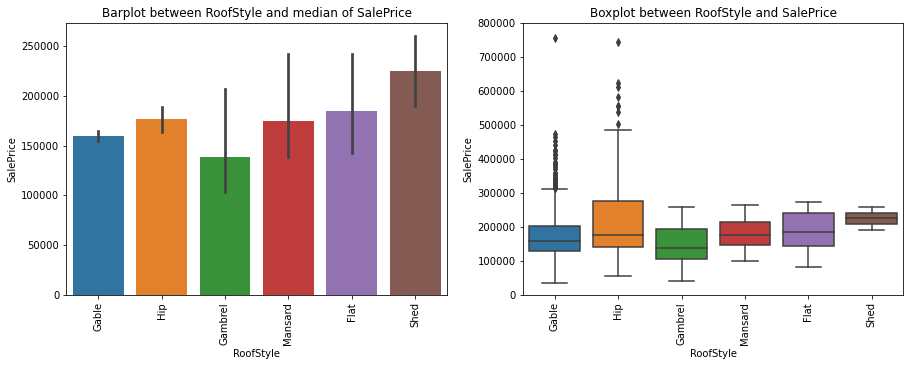

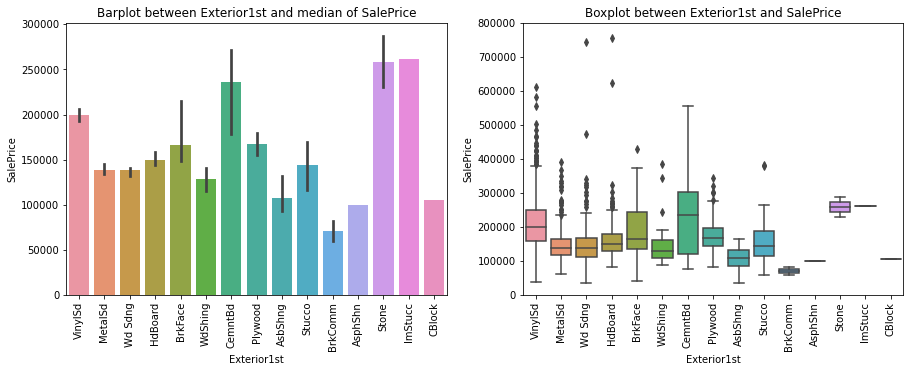

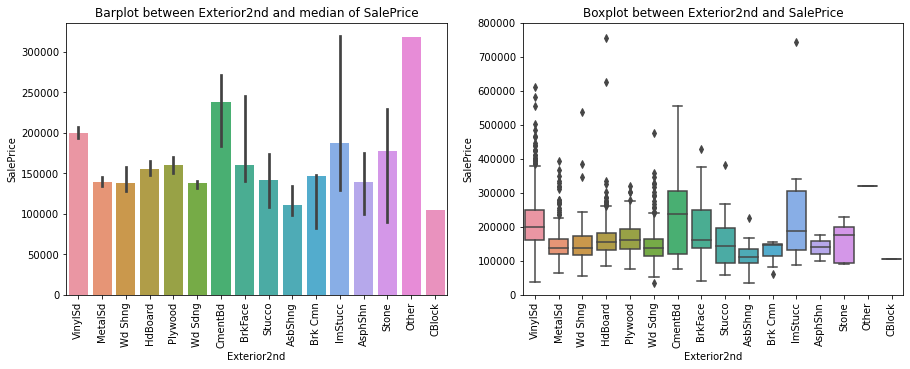

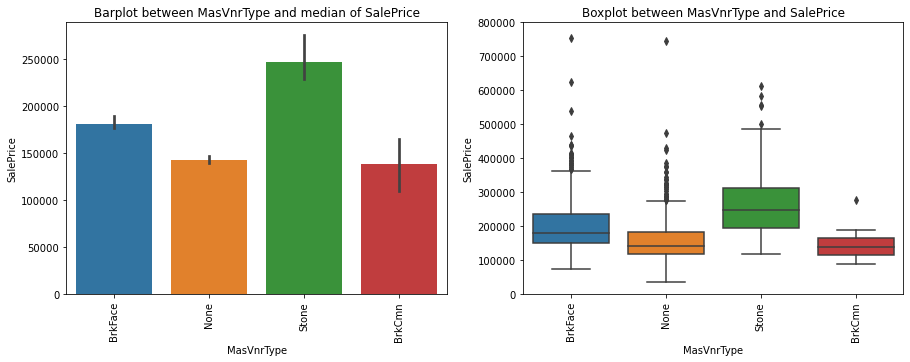

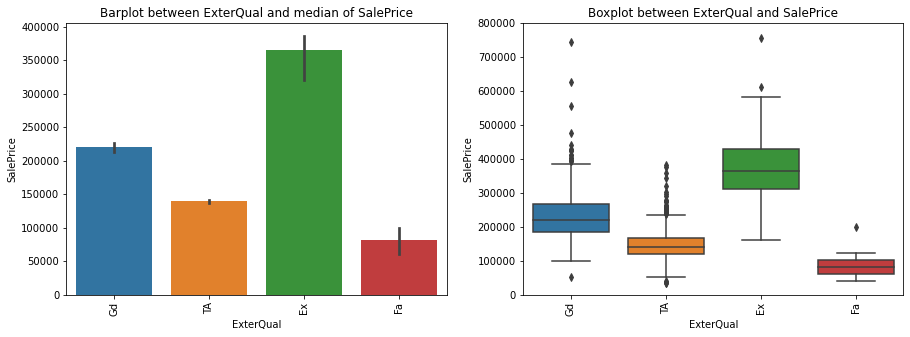

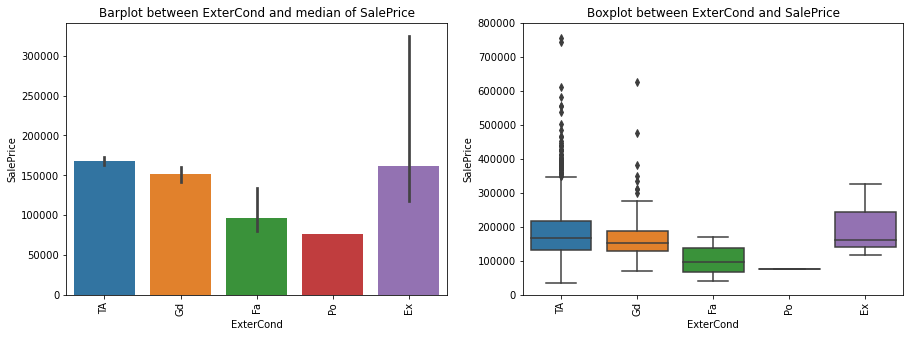

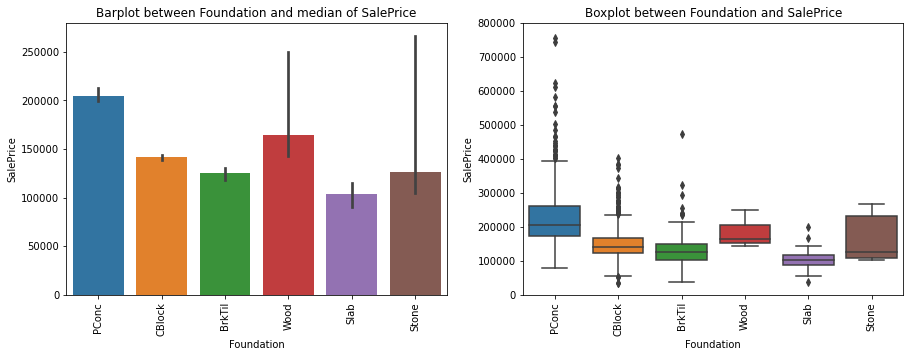

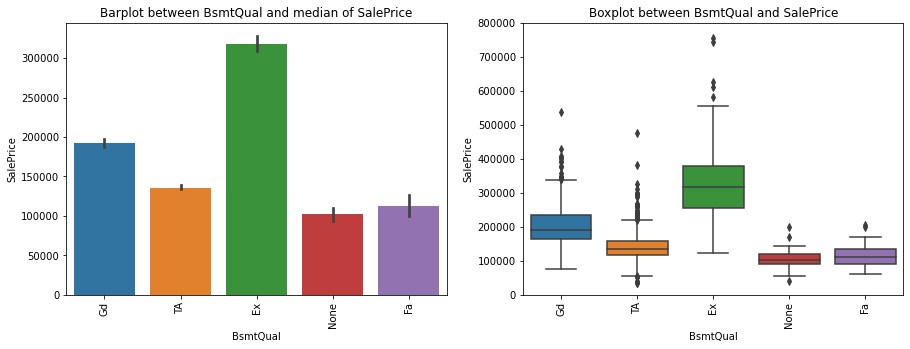

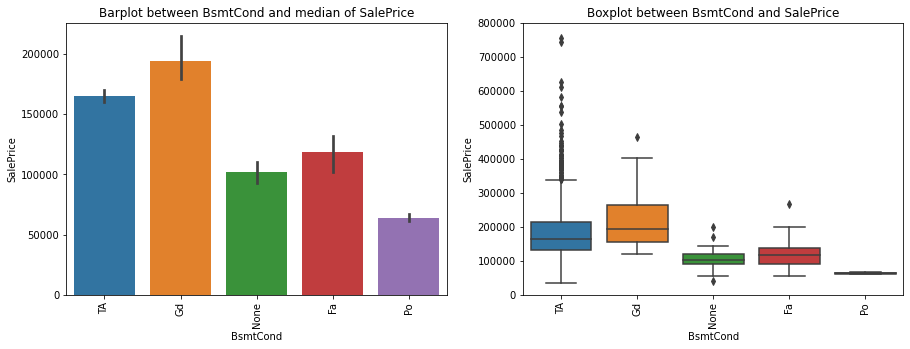

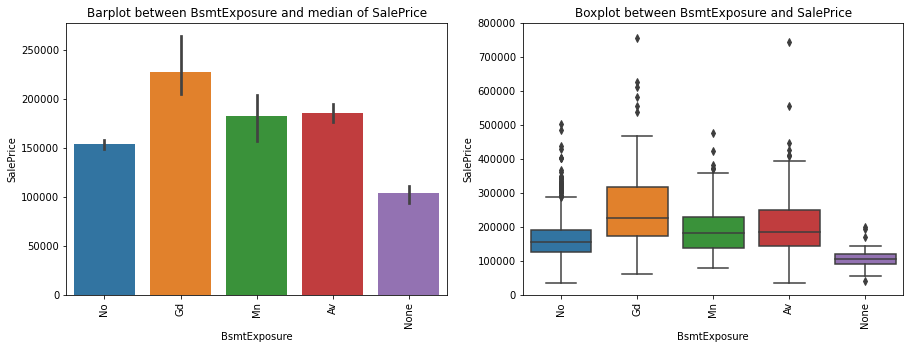

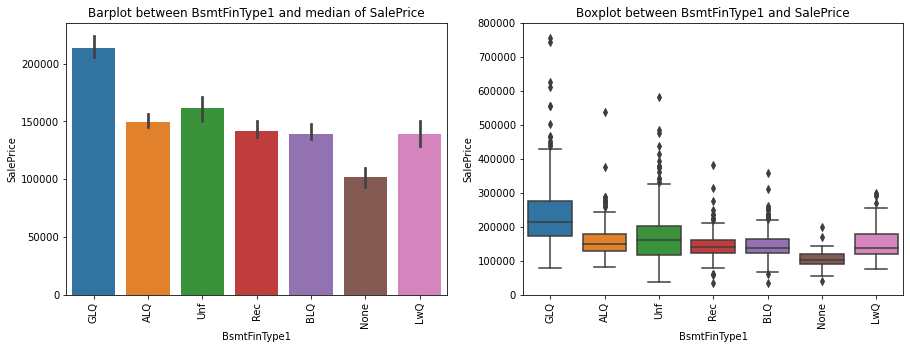

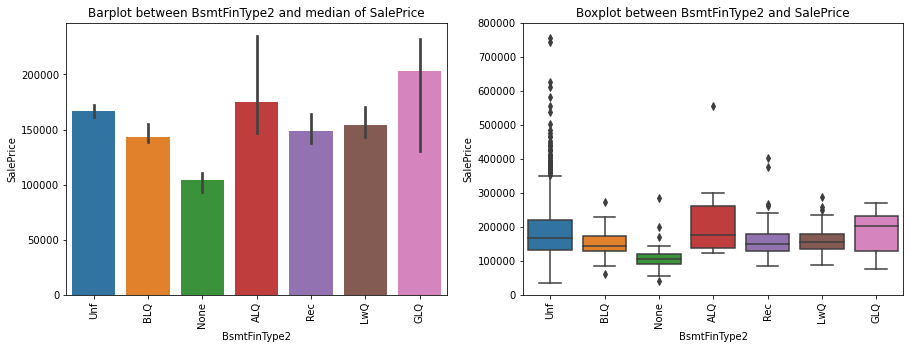

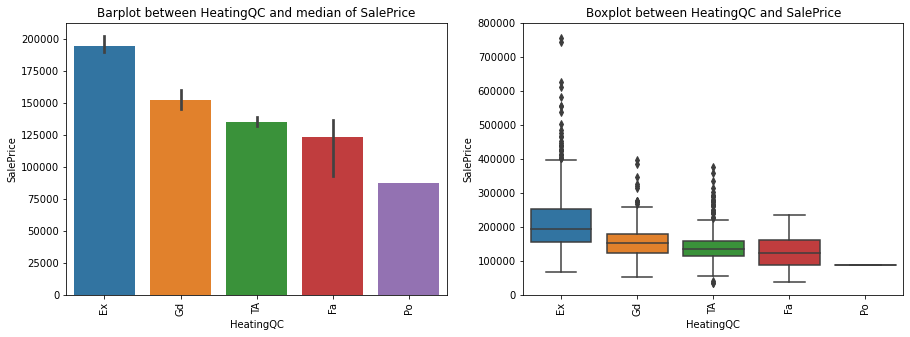

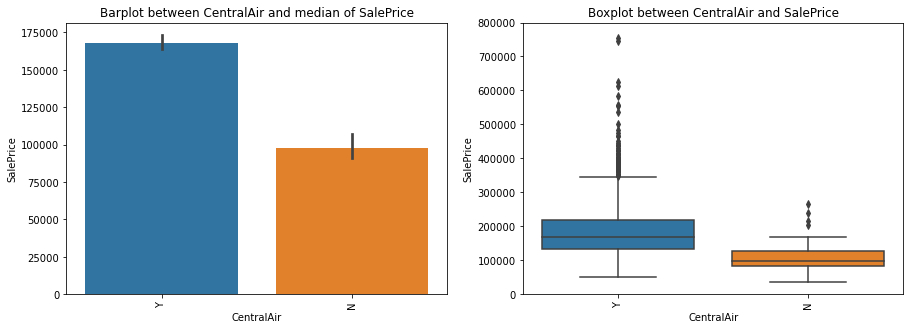

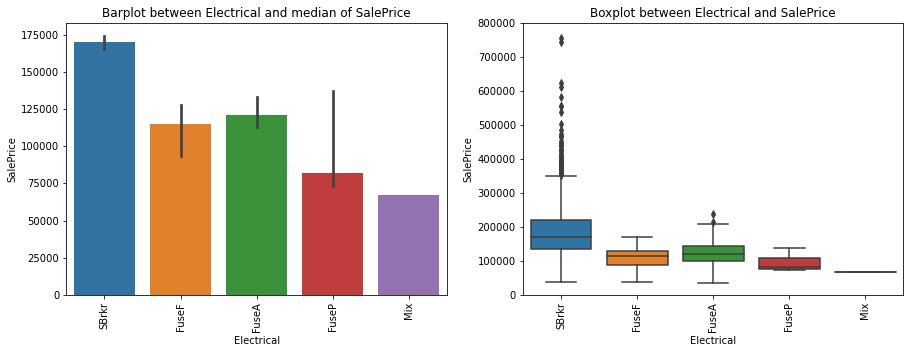

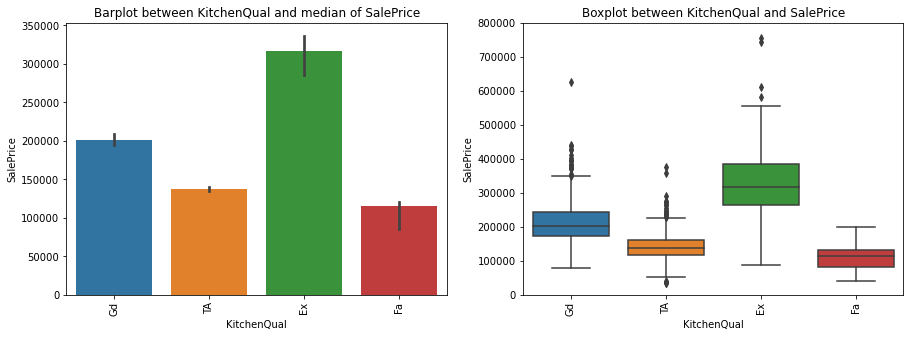

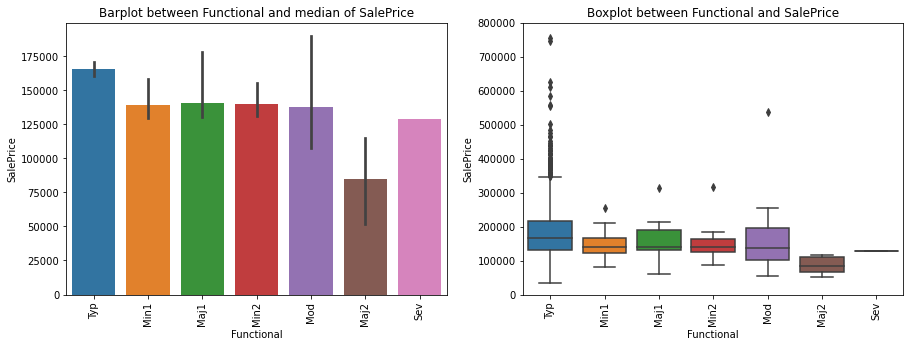

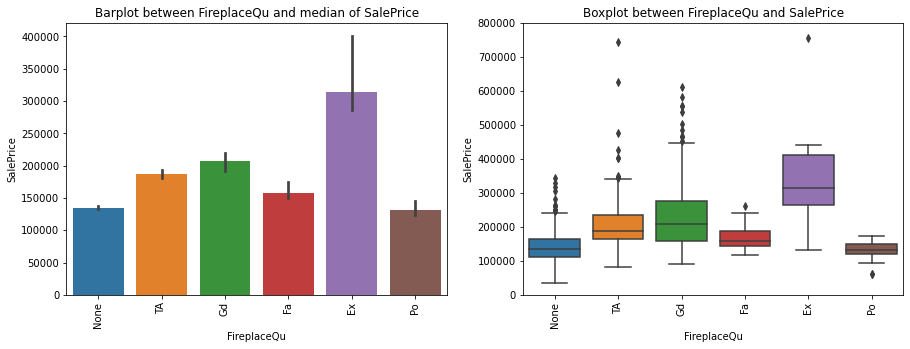

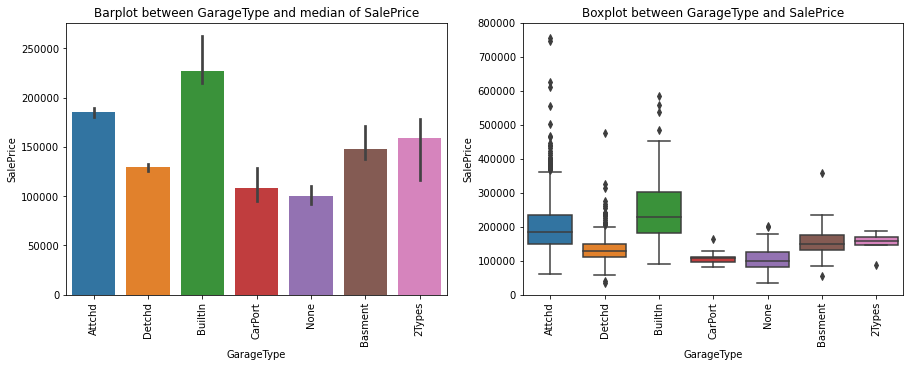

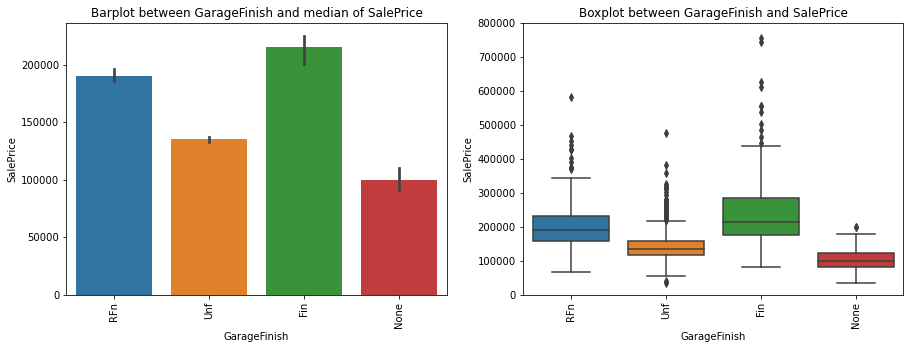

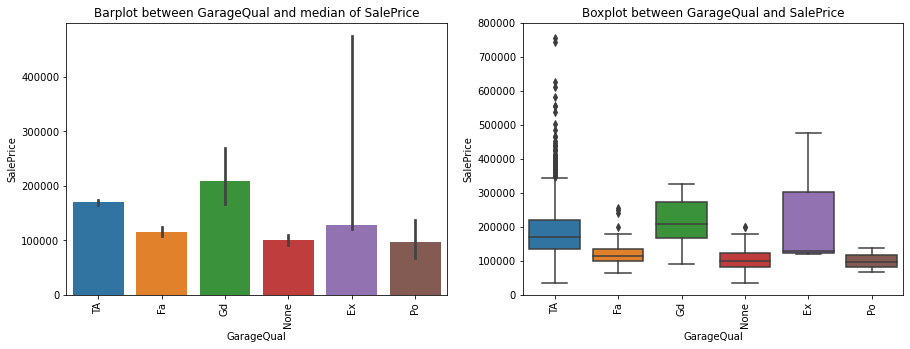

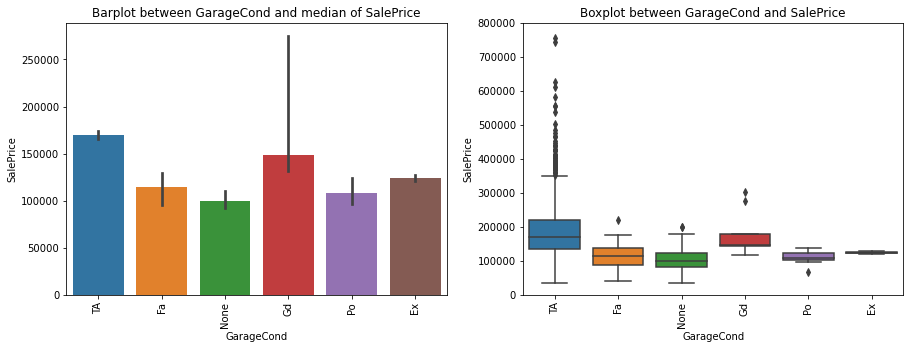

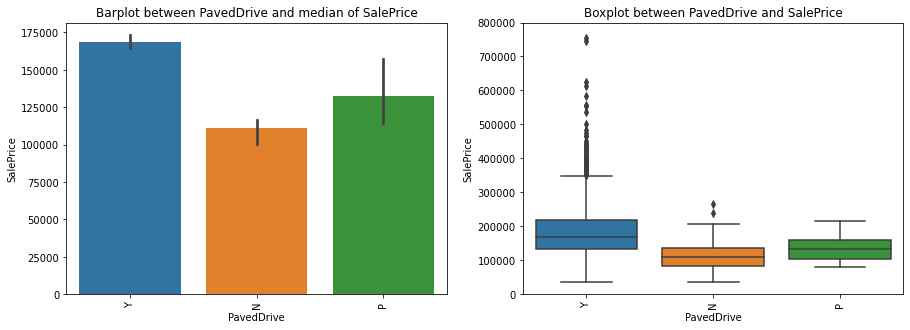

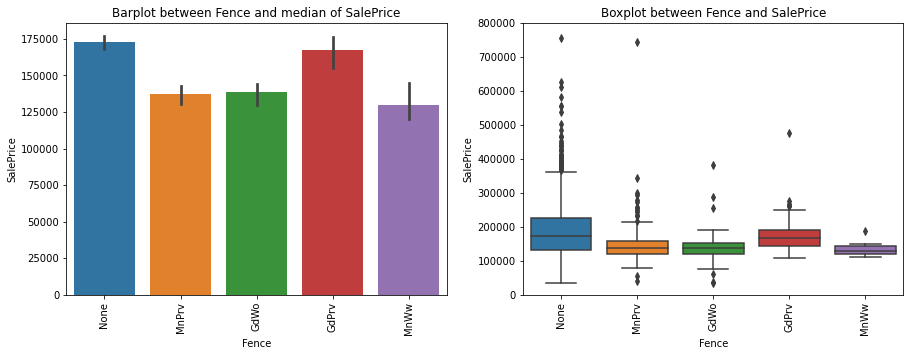

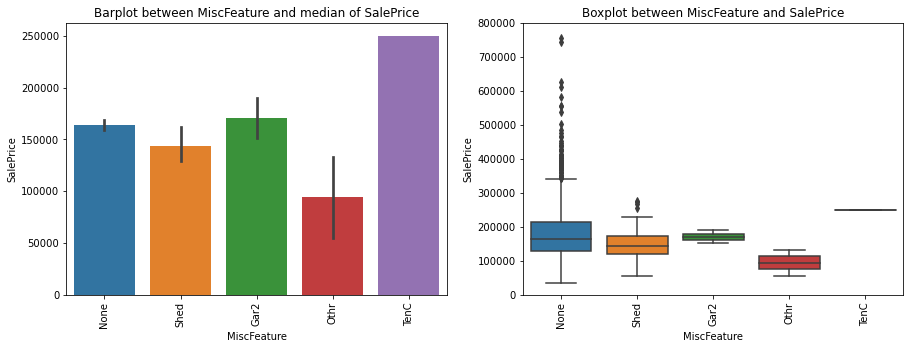

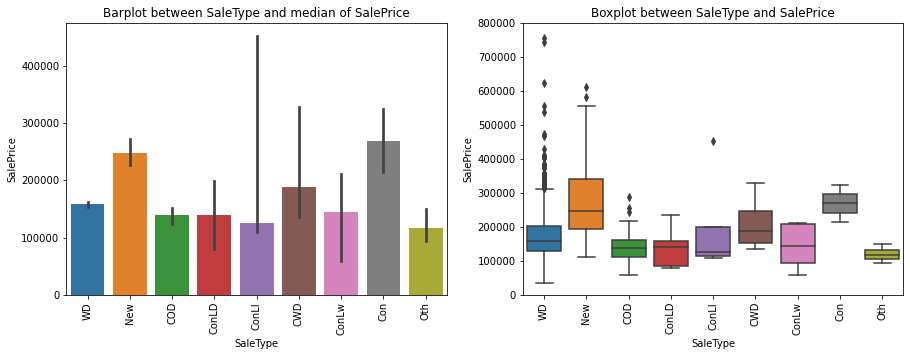

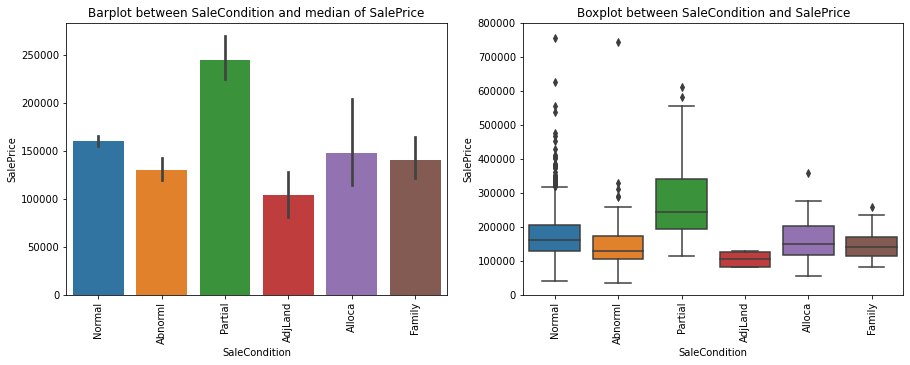

In [210]:
# Analyse relation between categorical variables and SalePrice using barplot and boxplot
# As SalePrice is having a skewed distribution, plotting the relationship using both median

for cols in catcols:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    #plt.title(f'Barplot between {cols} and mean of SalePrice')
    #sns.barplot(x=cols,y='SalePrice',data=house_data)
    plt.title(f'Barplot between {cols} and median of SalePrice')
    sns.barplot(x=cols,y='SalePrice',data=house_data,estimator=np.median)
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    plt.title(f'Boxplot between {cols} and SalePrice')
    sns.boxplot(data = house_data, x=cols,y='SalePrice')
    plt.xticks(rotation=90)
    plt.ylim(0,800000)
    
    plt.show()

Inferences: 
- SalePrice increases as ExterQual,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu rating increases.
- Houses with no basement have higher price than houses with poor conditioned basement.
- Houses with central air conditioning has higher price than houses without central air conditioning.
- Houses with built in and attached garage has higher price.
- Higher price for newly built and sold houses. Info from SaleType column.
- SaleCondition category which has higher SalePrice is also indicating new houses.
- SalePrice almost increases as ExterCond rating increases.Here Average rating houses have higher median price than good rated houses.
- Median SalePrice is highest for NridgHt(Northridge Heights) and lowest for Meadow Village.
- Boxplot between SalePrice and HouseStyle looks like the plot of cosine.


###### 1.3 Multivariate analysis

Inorder to do multivariate analyis, converting the quality features which can be label encoded before finding correlation matrix.

In [211]:
# Check the unique values in the features to be label encoded
to_labelenc_cols=['ExterQual','ExterCond','KitchenQual','BsmtQual','BsmtCond','GarageQual','GarageCond',
                  'HeatingQC','BsmtExposure']
for col in to_labelenc_cols:
    print(col,house_data[col].unique())

ExterQual ['Gd' 'TA' 'Ex' 'Fa']
ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex']
KitchenQual ['Gd' 'TA' 'Ex' 'Fa']
BsmtQual ['Gd' 'TA' 'Ex' 'None' 'Fa']
BsmtCond ['TA' 'Gd' 'None' 'Fa' 'Po']
GarageQual ['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']
GarageCond ['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']
HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' 'None']


Below encoding will be done for catergories to maintain order in the levels of features.
Ex - 5
Gd - 4
Ta - 3
Fa - 2
None - 1
Po - 0

In most of the features , SalePrice is better for feture value as None than Poor. So giving a higher order for None level than Poor level.
 

In [212]:
# Defining the map function for label encoding
def label_enc_map(x):
    if x.name=='BsmtExposure':
        return x.map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None' : 0 })
    else:
        return x.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa' : 2 ,'None': 1, 'Po': 0 })

# Applying the function to the housing list
house_data[to_labelenc_cols] = house_data[to_labelenc_cols].apply(label_enc_map)

In [ ]:
#
#where categorical_values_train is a list containing all categorical variables.
#for i in categorical_values_train: 
#    feature_set = set(house[i])
#    for j in feature_set:
#        feature_list = list(feature_set)
#        house.loc[house[i] == j, i] = feature_list.index(j) # not according to order

In [213]:
# Verify the applied label encoding 
for col in to_labelenc_cols:
    print(col,house_data[col].unique())

ExterQual [4 3 5 2]
ExterCond [3 4 2 0 5]
KitchenQual [4 3 5 2]
BsmtQual [4 3 5 1 2]
BsmtCond [3 4 1 2 0]
GarageQual [3 2 4 1 5 0]
GarageCond [3 2 1 4 0 5]
HeatingQC [5 4 3 2 0]
BsmtExposure [1 4 2 3 0]


In [214]:
# Updating the numcols,dinumcols and catcols
numcols = house_data.select_dtypes(include=np.number).columns
catcols = house_data.select_dtypes(include= 'object').columns
disnumcols.clear()
for cols in numcols:
    val=len(house_data[cols].unique())
    if val<21:
        disnumcols.append(cols)
print('discret columns:',len(disnumcols),'numeric columns:',len(numcols),'categorical column:',len(catcols))

discret columns: 23 numeric columns: 44 categorical column: 28


In [215]:
house_data.shape

(1460, 72)

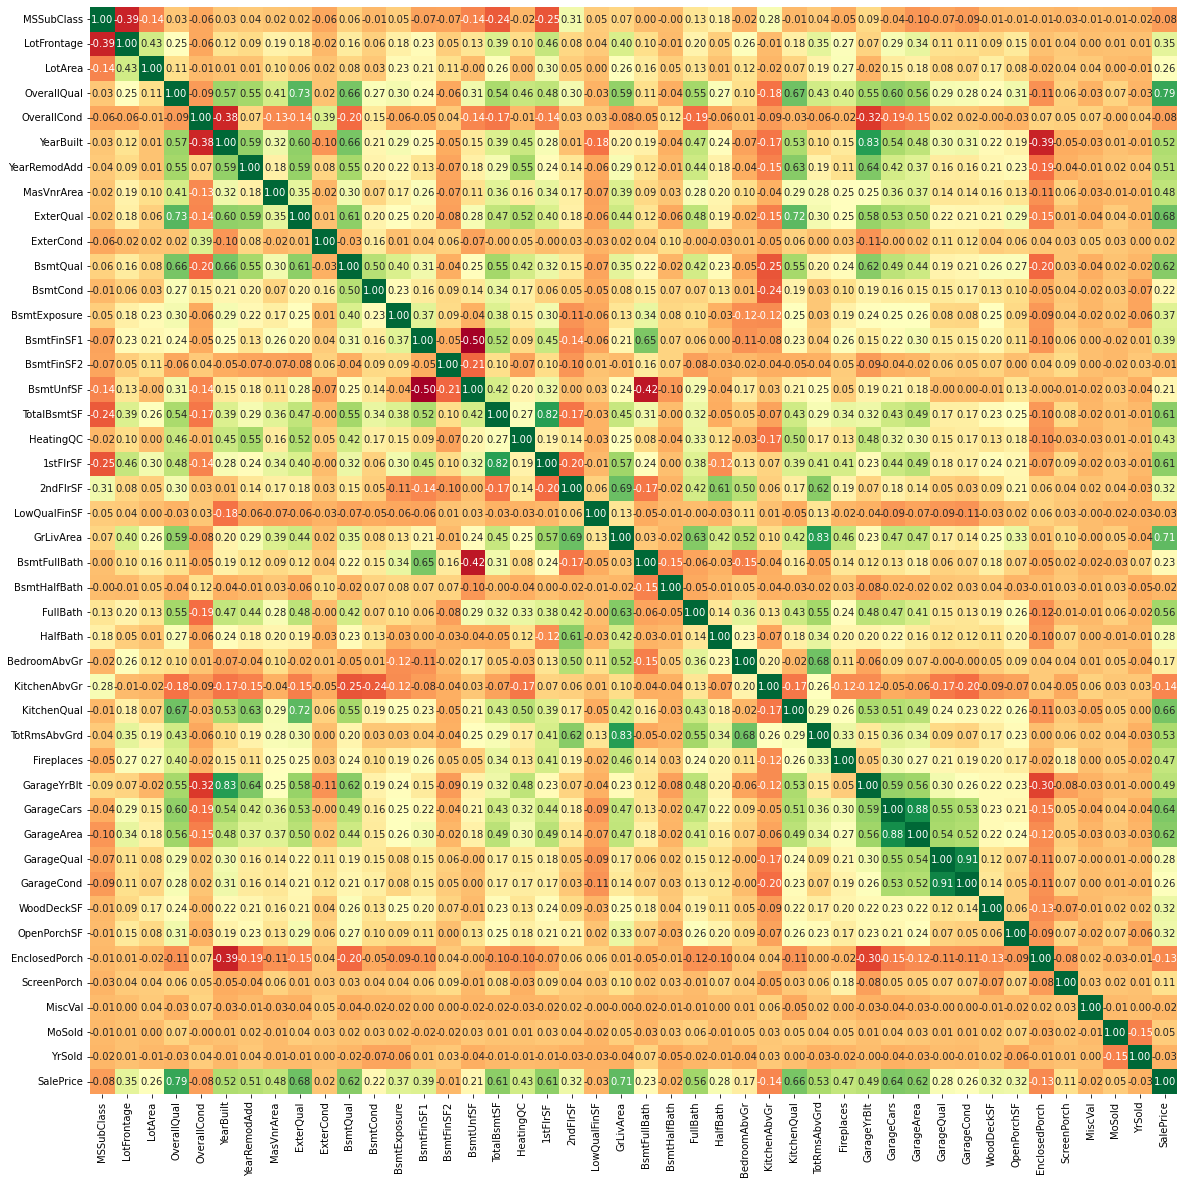

In [216]:
# Create correlation matrix for continuous variables
corrmat_c = house_data[numcols].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat_c, square=True, annot=True,fmt=".2f",cmap="RdYlGn",cbar=False)
plt.show()

Inferences:
- SalePrice has high positive correlation with many features.
- So much of multicollinearity is present in the data between predictor variables. This will have to be handled as we are building a regression model. Many of these variables are area related.
- YearBuilt and GarageYrBlt is having 0.83 of correlation coefficient.
- GrLivArea and TotRmsAbvGrd have high correlation.



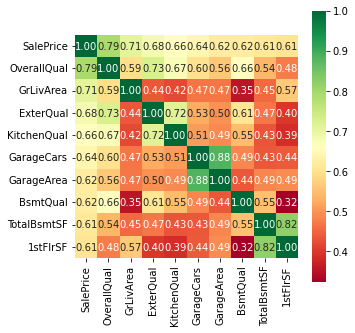

In [217]:
# Finding the top 10 correlations with SalePrice from the matrix
corr_topcols=corrmat_c.nlargest(10,"SalePrice")['SalePrice'].index
corrmat_t = house_data[corr_topcols].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corrmat_t, square=True, annot=True,fmt=".2f",cmap="RdYlGn")
plt.show()

Inferences:
- SalePrice has high positive correlation with OverallQual,GrLivArea,ExterQual,GarageArea,TotalBsmtSF,1stFlrSF

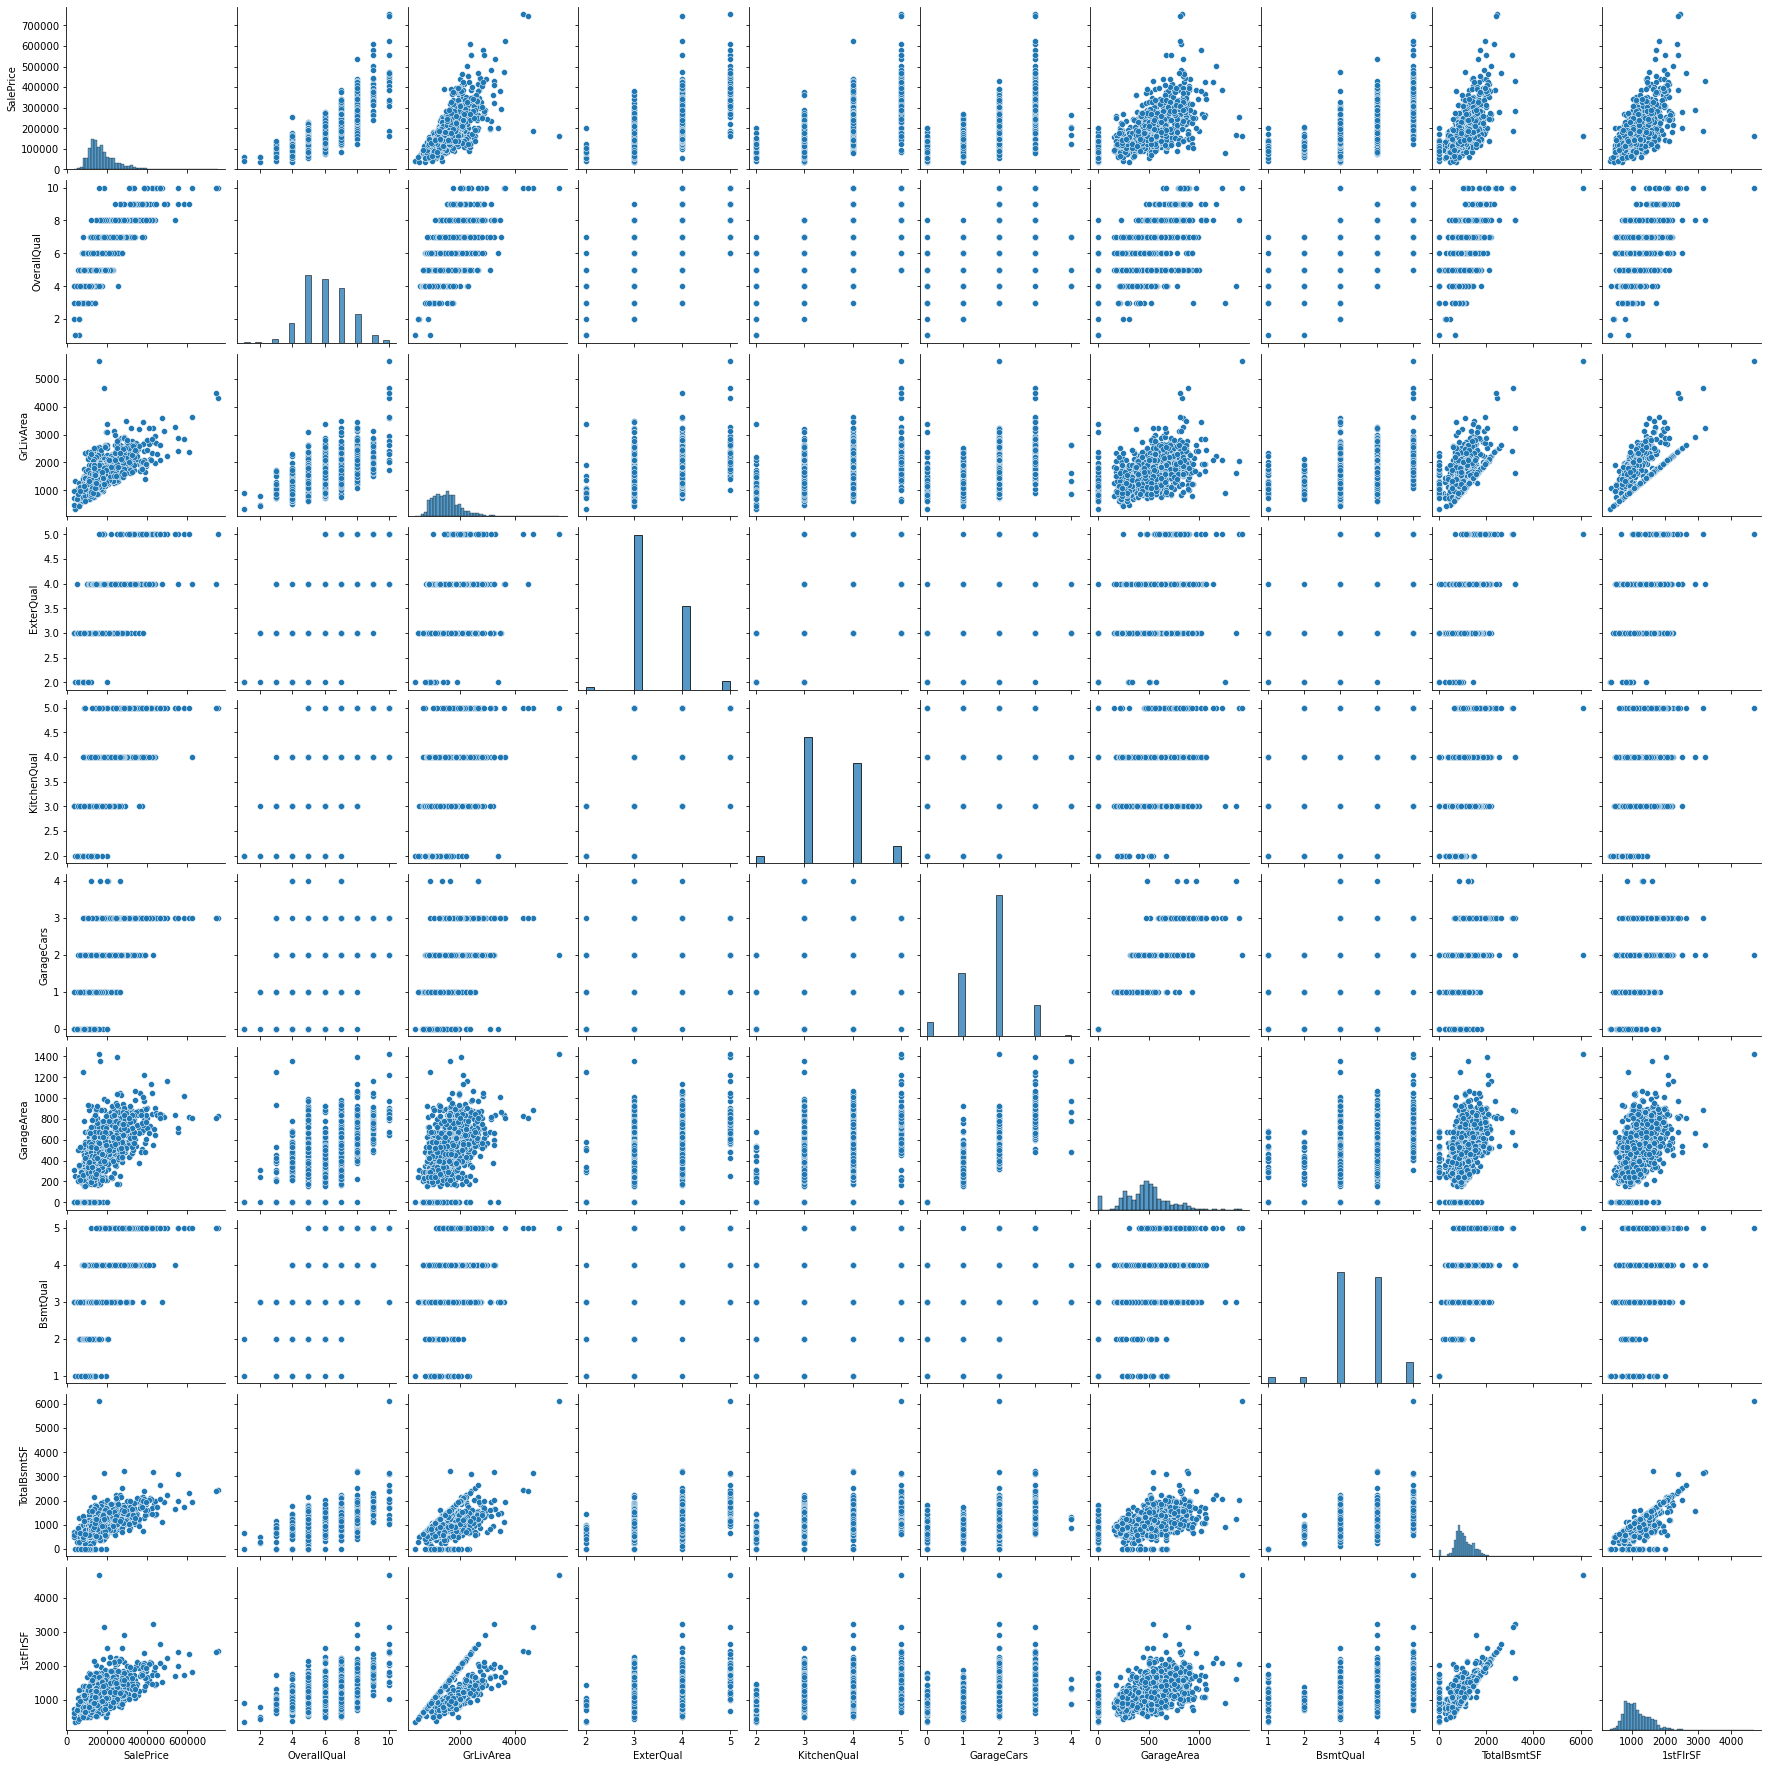

In [218]:
# Pairplot for top 10 features
sns.pairplot(house_data[corr_topcols])
plt.show()

Inferences:
- As SalePrice is linearly related to many features, we can proceed with building a linear regression model
- Most of the continuous features are correlated to each other.

## Step2: Data Preperation

###### 2.1 Handle missing values

In [219]:
miss_val_cols

['LotFrontage', 'GarageYrBlt', 'MasVnrType', 'MasVnrArea', 'Electrical']

In [220]:
house_data[miss_val_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   GarageYrBlt  1379 non-null   float64
 2   MasVnrType   1452 non-null   object 
 3   MasVnrArea   1452 non-null   float64
 4   Electrical   1459 non-null   object 
dtypes: float64(3), object(2)
memory usage: 57.2+ KB


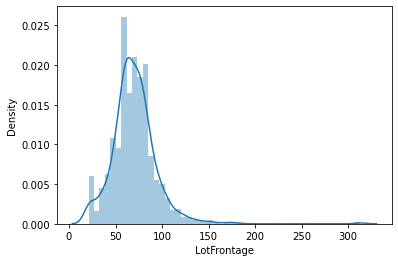

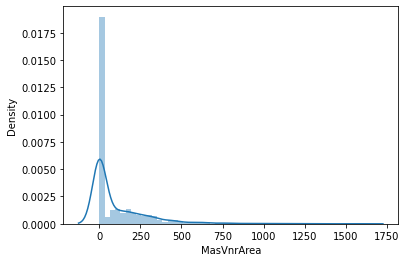

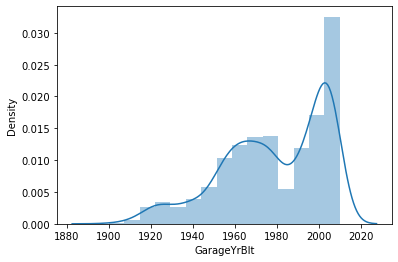

In [221]:
#Check the distribution of continuous columns
for col in ['LotFrontage','MasVnrArea','GarageYrBlt']:
    sns.distplot(house_data[col])
    plt.show()

In [222]:
# Filling missing values of continuous column with median value as they have skewed distribution and object type 
# columns with mode values.
house_data.GarageYrBlt =  house_data.GarageYrBlt.fillna(house_data["GarageYrBlt"].median())
house_data.LotFrontage = house_data.LotFrontage.fillna(house_data["LotFrontage"].median())
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data["MasVnrArea"].median())

house_data.MasVnrType = house_data.MasVnrType.fillna(value=house_data["MasVnrType"].mode().values[0])
house_data.Electrical = house_data.Electrical.fillna(value=house_data["Electrical"].mode().values[0])


In [223]:
#Check for missing values
house_data.isna().mean()[house_data.isna().mean()>0]

Series([], dtype: float64)

###### 2.2 Check distribution of response variable and it's transformations

skew of SalePrice: 1.880940746034036
kurtosis of SalePrice: 6.509812011089439
skew sqrt SalePrice: 0.9421834681211159
kurtosis sqrt SalePrice: 1.9469987212364908
skew log SalePrice: 0.1212103673013655
kurtosis log SalePrice: 0.8026555069117713


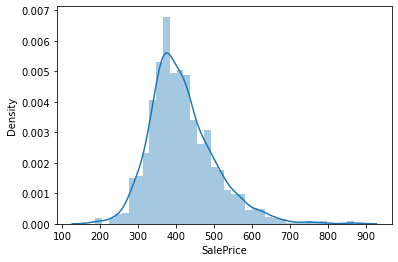

In [224]:
# Check skewness and kutosis for SalePrice and log, sqrt transformations of SalePrice
print('skew of SalePrice:',stats.skew((house_data.SalePrice)))
print('kurtosis of SalePrice:',stats.kurtosis((house_data.SalePrice)))
sns.distplot(np.sqrt(house_data.SalePrice))
print('skew sqrt SalePrice:',stats.skew(np.sqrt(house_data.SalePrice)))
print('kurtosis sqrt SalePrice:',stats.kurtosis(np.sqrt(house_data.SalePrice)))
print('skew log SalePrice:',stats.skew(np.log(house_data.SalePrice)))
print('kurtosis log SalePrice:',stats.kurtosis(np.log(house_data.SalePrice)))
plt.show()

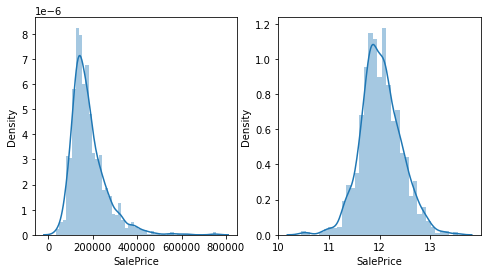

In [225]:
#Check the distribution of log transform of SalePrice
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.distplot(house_data.SalePrice)
plt.subplot(1,2,2)
sns.distplot(np.log(house_data.SalePrice))
plt.show()

skewness and kurtosis is least for log transformation of SalePrice compared to square root. Also the variance will be less due to shrinkage of response variable.
Log transformation has made the distribution of response variable to a normal distribution. This will help to successfully evaluate linear regression assumptions.

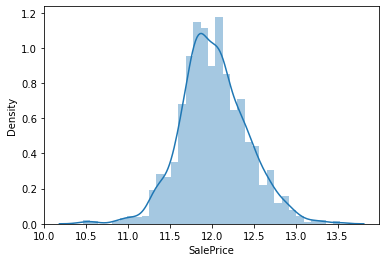

In [226]:
# Perform log transformation
house_data.SalePrice = np.log(house_data.SalePrice)
#Check the distribution
sns.distplot(house_data.SalePrice)
plt.show()

###### 2.3 Dummy encode categorical features

In [227]:
#Create list of columns for dummy encoding
dumcol = list(set(catcols)- set(['CentralAir']))

In [228]:
dummy_cols = pd.get_dummies(house_data[dumcol],drop_first=True)
dummy_cols.head()

LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Exterior1st_AsphShn  Exterior1st_BrkComm  \
0                1                    0                    0   
1                1                    0                    0   
2                1                    0                    0   
3                1                    0                    0   
4                1                    0                    0   

   Exterior1st_BrkFace  Exterior1st_CBlock  Exterior1st_CemntBd  \
0                    0                   0                    0   
1                    0                   0                    0   
2                    0                   0                    0   
3                    0                   0                    0   
4                    0                   0                    0   

   Exterior1st_HdBoard  Exterior1st_ImStucc  Exterior1st_MetalSd  \
0                    0                    0                    0   
1                    0                    0                    1   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Exterior1st_Plywood  Exterior1st_Stone  Exterior1st_Stucco  \
0                    0                  0                   0   
1                    0                  0                   0   
2                    0                  0                   0   
3                    0                  0                   0   
4                    0                  0                   0   

   Exterior1st_VinylSd  Exterior1st_Wd Sdng  Exterior1st_WdShing  \
0                    1                    0                    0   
1                    0                    0                    0   
2                    1                    0                    0   
3                    0                    1                    0   
4                    1                    0                    0   

   FireplaceQu_Fa  FireplaceQu_Gd  FireplaceQu_None  FireplaceQu_Po  \
0               0               0                 1               0   
1               0               0                 0               0   
2               0               0                 0               0   
3               0               1                 0               0   
4               0               0                 0               0   

   FireplaceQu_TA  SaleCondition_AdjLand  SaleCondition_Alloca  \
0               0                      0                     0   
1               1                      0                     0   
2               1                      0                     0   
3               0                      0                     0   
4               1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
0                     0                     1                      0   
1                     0                     1                      0   
2                     0                     1                      0   
3                     0                     0                      0   
4                     0                     1                      0   

   Fence_GdWo  Fence_MnPrv  Fence_MnWw  Fence_None  MiscFeature_None  \
0           0            0           0           1                 1   
1           0            0           0           1                 1   
2           0            0           0        

In [229]:
dummy_cols.shape

(1460, 162)

In [230]:
# Binary encoding
house_data['CentralAir'] = house_data['CentralAir'].apply(lambda x: 1 if x=='Y' else 0)
house_data['CentralAir'].head()

0    1
1    1
2    1
3    1
4    1
Name: CentralAir, dtype: int64

In [231]:
# Drop dummy encoded columns from main dataset and then concatenate encoded features to main data set
house_data.drop(labels=dumcol,axis=1,inplace=True)
house_data.shape

(1460, 45)

In [232]:
house_data = pd.concat([house_data,dummy_cols], axis=1)
house_data.shape

(1460, 207)

###### 2.4 Train test split

In [233]:
# Import library
from sklearn.model_selection import train_test_split

In [234]:
# divide to X & y and divide data into Train and Test
X = house_data.drop('SalePrice', axis=1)
y = house_data.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [235]:
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0          2003       196.0          4          3         4         3   
1          1976         0.0          3          3         4         3   
2          2002       162.0          4          3         4         3   
3          1970         0.0          3          3         3         4   
4          2000       350.0          4          3         4         3   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0             1         706           0        150          856          5   
1             4         978           0        284         1262          5   
2             2         486           0        434          920          5   
3             1         216           0        540          756          4   
4             3         655           0        490         1145          5   

   CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           1       856       854             0       1710             1   
1           1      1262         0             0       1262             0   
2           1       920       866             0       1786             1   
3           1       961       756             0       1717             1   
4           1      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0         2         1             3             1            4   
1             1         2         0             3             1            3   
2             0         2         1             3             1            4   
3             0         1         0             3             1            4   
4             0         2         1             4             1            4   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  GarageQual  \
0             8           0       2003.0           2         548           3   
1             6           1       1976.0           2         460           3   
2             6           1       2001.0           2         608           3   
3             7           1       1998.0           3         642           3   
4             9           1       2000.0           3         836           3   

   GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MiscVal  \
0           3           0           61              0            0        0   
1           3         298            0              0            0        0   
2           3           0           42              0            0        0   
3           3           0           35            272            0        0   
4           3         192           84              0            0        0   

   MoSold  YrSold  LotShape_IR2  ...  GarageType_Detchd  GarageType_None  \
0       2    2008             0  ...                  0                0   
1       5    2007             0  ...                  0                0   
2       9    2008             0  ...                  0                0   
3       2    2006             0  ...                  1                0   
4      12    2008             0  ...                  0                0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   

In [236]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

###### 2.5 Feature scaling

In [237]:
# Standardization
from sklearn.preprocessing import MinMaxScaler

In [238]:
scaler= MinMaxScaler()

X_train[list(set(numcols)-set(['SalePrice']))] = scaler.fit_transform(X_train[list(set(numcols)-set(['SalePrice']))])

X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
318     0.235294     0.236301  0.039403     0.666667        0.500   0.876812   
239     0.176471     0.106164  0.033981     0.555556        0.375   0.528986   
986     0.176471     0.130137  0.017931     0.555556        0.875   0.275362   
1416    1.000000     0.133562  0.046139     0.333333        0.625   0.094203   
390     0.176471     0.099315  0.032409     0.444444        0.875   0.202899   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
318       0.716667        0.16   0.666667   0.333333      0.75      0.75   
239       0.000000        0.00   0.333333   0.333333      0.50      0.50   
986       0.883333        0.00   0.333333   0.666667      0.50      0.50   
1416      0.000000        0.00   0.333333   0.333333      0.50      0.75   
390       0.000000        0.00   0.333333   0.333333      0.50      1.00   

      BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
318           1.00    0.174876    0.000000   0.154110     0.220458        1.0   
239           0.25    0.016655    0.000000   0.274401     0.120295        0.6   
986           0.25    0.000000    0.000000   0.207620     0.079378        0.8   
1416          0.25    0.000000    0.000000   0.332620     0.127169        0.8   
390           0.25    0.042700    0.265265   0.098031     0.140917        1.0   

      CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
318            1  0.231481  0.616949           0.0   0.424289      0.333333   
239            1  0.098611  0.333656           0.0   0.201576      0.000000   
986            1  0.145602  0.307022           0.0   0.230015      0.000000   
1416           1  0.202315  0.505569           0.0   0.355880      0.000000   
390            1  0.136343  0.196610           0.0   0.178517      0.333333   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
318            0.0  0.666667       0.5         0.500           0.0   
239            0.0  0.333333       0.5         0.375           0.0   
986            0.0  0.333333       0.0         0.250           0.0   
1416           0.0  0.666667       0.0         0.500           0.5   
390            0.0  0.333333       0.0         0.500           0.0   

      KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
318      0.666667      0.545455    0.333333     0.845455        0.75   
239      0.333333      0.363636    0.333333     0.445455        0.25   
986      0.666667      0.181818    0.000000     0.454545        0.25   
1416     0.333333      0.727273    0.000000     0.645455        0.50   
390      0.333333      0.363636    0.000000     0.709091        0.25   

      GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
318     0.462623         0.6         0.6    0.396733     0.114723   
239     0.155148         0.6         0.6    0.000000     0.267686   
986     0.179831         0.4         0.6    0.459743     0.000000   
1416    0.394922         0.6         0.6    0.000000     0.000000   
390     0.270804         0.6         0.6    0.000000     0.248566   

      EnclosedPorch  ScreenPorch  MiscVal    MoSold  YrSold  LotShape_IR2  \
318        0.260870          0.0      0.0  0.272727    0.75             0   
239        0.000000          0.0      0.0  0.272727    1.00             0   
986        0.000000          0.0      0.0  0.454545    0.00             0   
1416       0.206522          0.0      0.0  0.272727    1.00             0   
390        0.202899          0.0      0.0  0.272727    0.50             0   

      ...  GarageType_Detchd  GarageType_None  LotConfig_CulDSac  \
318   ...                  0                0                  0   
239   ...                  1                0                  0   
986   ...                  0                0                  0   
1416  ...                  1                0                  0   
390   ...                  1      

## Step3: Model Building and Evaluation

Starting with linear regression model and checking accuracy of the model. 

###### 3.1 Build and evaluate first model

In [239]:
# Import LinearRegression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics      import r2_score,mean_squared_error

In [240]:
# Build linear regression model using sklearn library
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression()

In [241]:
# Predictions on the basis of the model
y_pred = lm1.predict(X_train)
y_pred

array([12.79005671, 11.79973507, 11.88408995, ..., 12.54828072,
       11.55689573, 12.35138702])

In [242]:
r2_score(y_train, y_pred) 

0.869935259323509

86.9% of the variation in SalePrice is explained by the model lm1 

In [243]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_pred))
print(rss)
mse = mean_squared_error(y_train, y_pred)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

20.86815890309159
0.02043894113916904
0.14296482483173628


Root mean square is very less. Let's do residual analysis

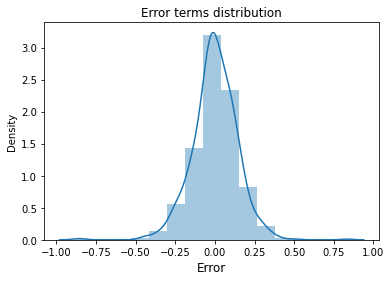

In [244]:
#Plot histogram of error terms

sns.distplot((y_train - y_pred),bins=15)
plt.title('Error terms distribution',fontsize=12)
plt.xlabel('Error',fontsize=12)
plt.show()

Error terms are normally distributed

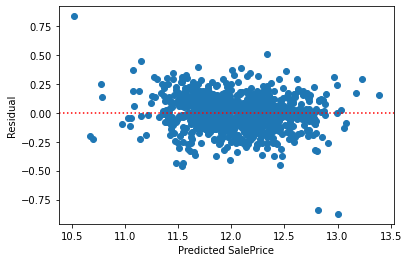

In [245]:
# Check whether there is a presence of non-normality in the data
plt.scatter(y_pred,(y_train - y_pred))
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residual")
plt.show()

As per above plot residual term are scattered randomly around zero, the spread is almost constant and there are no considerable extreme points.

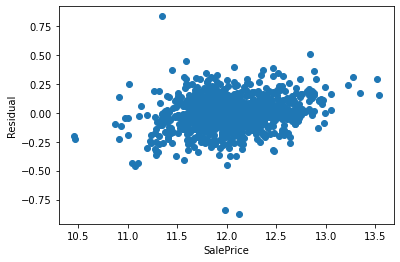

In [246]:
# Check whether error terms are independent
plt.scatter(y_train,(y_train - y_pred))
plt.xlabel("SalePrice")
plt.ylabel("Residual")
plt.show()

Error terms here doesn't follow any obvious pattern. So this linear model is realiable. But let's check test accuracy now. Scaling variables before prediction.

In [247]:
X_test[list(set(numcols)-set(['SalePrice']))] = scaler.transform(X_test[list(set(numcols)-set(['SalePrice']))])

X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
1436    0.000000     0.133562  0.035192     0.333333        0.625   0.717391   
57      0.235294     0.232877  0.047566     0.666667        0.500   0.956522   
780     0.000000     0.143836  0.029930     0.666667        0.500   0.891304   
382     0.235294     0.198630  0.036338     0.666667        0.500   0.971014   
1170    0.352941     0.188356  0.039309     0.555556        0.625   0.760870   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
1436      0.350000     0.00000   0.333333   0.333333      0.50      0.75   
57        0.900000     0.00000   0.666667   0.333333      0.75      0.75   
780       0.766667     0.02375   0.333333   0.333333      0.75      1.00   
382       0.933333     0.00000   0.666667   0.333333      0.75      0.75   
1170      0.450000     0.00000   0.333333   0.333333      0.50      0.75   

      BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
1436          0.25    0.109142         0.0   0.106164     0.141408        0.6   
57            0.25    0.000000         0.0   0.368151     0.140753        1.0   
780           0.25    0.000000         0.0   0.529538     0.202455        0.8   
382           0.75    0.000000         0.0   0.401969     0.153682        1.0   
1170          0.75    0.092488         0.0   0.245719     0.179378        0.6   

      CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
1436           1  0.113889  0.000000           0.0   0.081860      0.000000   
57             1  0.112963  0.416465           0.0   0.246349      0.000000   
780            1  0.203935  0.000000           0.0   0.156610      0.000000   
382            1  0.131250  0.415496           0.0   0.261145      0.000000   
1170           1  0.172685  0.000000           0.0   0.130669      0.333333   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1436           0.0  0.333333       0.0         0.375           0.0   
57             0.0  0.666667       0.5         0.375           0.0   
780            0.0  0.666667       0.0         0.375           0.0   
382            0.0  0.666667       0.5         0.375           0.0   
1170           0.0  0.333333       0.0         0.375           0.0   

      KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
1436     0.333333      0.181818    0.000000     0.672727        0.50   
57       0.666667      0.363636    0.000000     0.945455        0.50   
780      0.333333      0.272727    0.333333     0.863636        0.50   
382      0.666667      0.454545    0.000000     0.963636        0.50   
1170     0.333333      0.272727    0.333333     0.700000        0.25   

      GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
1436    0.372355         0.6         0.6    0.000000     0.000000   
57      0.398449         0.6         0.6    0.000000     0.133843   
780     0.283498         0.6         0.6    0.256709     0.040153   
382     0.450635         0.6         0.6    0.168028     0.101338   
1170    0.252468         0.6         0.6    0.236873     0.000000   

      EnclosedPorch  ScreenPorch  MiscVal    MoSold  YrSold  LotShape_IR2  \
1436            0.0          0.0      0.0  0.363636    0.25             0   
57              0.0          0.0      0.0  0.636364    0.00             0   
780             0.0          0.0      0.0  0.454545    0.25             0   
382             0.0          0.0      0.0  0.272727    0.25             0   
1170            0.0          0.0      0.0  0.545455    0.50             0   

      ...  GarageType_Detchd  GarageType_None  LotConfig_CulDSac  \
1436  ...                  1                0                  0   
57    ...                  0                0                  0   
780   ...                  0                0                  0   
382   ...                  0                0                  0   
1170  ...                  0      

In [248]:
y_test_pred = lm1.predict(X_test)

In [249]:
r2_score(y_test,y_test_pred)

-2.789797912179218e+24

In [250]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rsst = np.sum(np.square(y_test - y_test_pred))
print(rsst)
mset = mean_squared_error(y_test , y_test_pred)
print(mset)
# Root Mean Squared Error
rmset = mset**0.5
print(rmset)

2.0185216368705035e+26
4.597999172825748e+23
678085479333.2289


In [251]:
# Consolidating the metric values and storing to  a new list so that it can be compared with other models later

y_pred_train = lm1.predict(X_train)
y_pred_test = lm1.predict(X_test)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_score:',r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_score:',r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('ssr_train_score:',rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('ssr_test_score:',rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_score:',mse_train_lr)
metric1.append(mse_train_lr**0.5)
print('rmse_train_score:',mse_train_lr**0.5)


mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_score:',mse_test_lr)
metric1.append(mse_test_lr**0.5)
print('rmse_test_score:',mse_test_lr**0.5)


r2_train_score: 0.869935259323509
r2_test_score: -2.789797912179218e+24
ssr_train_score: 20.86815890309159
ssr_test_score: 2.0185216368705035e+26
mse_train_score: 0.02043894113916904
rmse_train_score: 0.14296482483173628
mse_test_score: 4.597999172825748e+23
rmse_test_score: 678085479333.2289


Error is very high for test data set. 0.86 r2 score in train has gone to negative value in test set. This is because model is overfitting very badly and also has high multicollinearity among predictors.  By applying regularisation, multicollinearity and overfitting can be reduced.
Let's now try Ridge and Lasso regressions.

###### 3.2 Ridge Regression

Trying ridge regression for prediction

In [252]:
#Import relevant libararies 
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV



In [253]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                       # scoring= 'neg_mean_absolute_error',  
                        scoring = 'neg_mean_squared_error',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [254]:
#Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [255]:
#Store cv result
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=10]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.007646      0.001958         0.003636        0.000852      0.0001   
1       0.005833      0.000179         0.002999        0.000029       0.001   
2       0.006323      0.001073         0.003095        0.000253        0.01   
3       0.005682      0.000015         0.002947        0.000050        0.05   
4       0.005726      0.000053         0.002992        0.000049         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.020134          -0.039986          -0.029710   
1   {'alpha': 0.001}          -0.020125          -0.039974          -0.029702   
2    {'alpha': 0.01}          -0.020043          -0.039857          -0.029660   
3    {'alpha': 0.05}          -0.019730          -0.039368          -0.029172   
4     {'alpha': 0.1}          -0.019405          -0.038841          -0.028593   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.016501          -0.021171        -0.025500        0.008439   
1          -0.016499          -0.021040        -0.025468        0.008449   
2          -0.016451          -0.020379        -0.025278        0.008498   
3          -0.016177          -0.019537        -0.024797        0.008475   
4          -0.015896          -0.019024        -0.024352        0.008394   

   rank_test_score  split0_train_score  split1_train_score  \
0               24           -0.011067           -0.008860   
1               23           -0.011067           -0.008860   
2               22           -0.011070           -0.008862   
3               21           -0.011088           -0.008880   
4               20           -0.011116           -0.008906   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.009537           -0.011818           -0.011344   
1           -0.009537           -0.011818           -0.011344   
2           -0.009542           -0.011818           -0.011346   
3           -0.009560           -0.011829           -0.011363   
4           -0.009592           -0.011854           -0.011395   

   mean_train_score  std_train_score  
0         -0.010525         0.001130  
1         -0.010525         0.001130  
2         -0.010528         0.001129  
3         -0.010544         0.001128  
4         -0.010573         0.001127

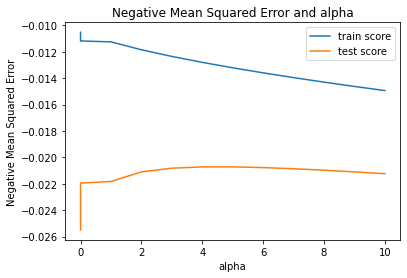

In [256]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title("Negative Mean Squared Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

 Fine tuning with values in the range between 4 and 6

In [257]:
params = {'alpha': [4,4.2,4.4,4.6,4.8,5,5.2,5.4,5.6,5.8,6]} 

ridge = Ridge()

# cross validation
folds = 5
model_cv1 = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                       # scoring= 'neg_mean_absolute_error',  
                        scoring = 'neg_mean_squared_error',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [4, 4.2, 4.4, 4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8,
                                   6]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [258]:
#Printing the best hyperparameter alpha
print(model_cv1.best_params_)

{'alpha': 4.6}


The best value of regularisation parameter is 4.6 only.

In [259]:
#Fitting Ridge model for alpha = 4.6 and printing coefficients which have been penalised
alpha = 4.6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-7.32923756e-02 -1.01380000e-02  9.55408353e-02  3.38797764e-01
  1.86872985e-01  4.85832700e-02  7.40585384e-02  1.39243520e-02
  4.02062465e-02 -5.64830618e-03  1.10566856e-01  3.80342859e-02
  8.60438420e-02  5.88864386e-02  4.15678912e-02  6.63834416e-02
  8.98032489e-02  4.65711028e-02  6.31214728e-02  2.07254161e-01
  1.74102577e-01  4.26040816e-04  2.41175866e-01  1.27128559e-01
  2.55874720e-03  1.44162430e-01  6.76219123e-02  9.66557736e-02
 -5.06504018e-02  8.36590446e-02  1.90735051e-01  4.32417325e-02
 -1.54370868e-02  1.53189466e-01  1.16636311e-01  6.84570656e-02
  2.37810571e-02  8.25825129e-02  1.49312518e-02  4.09258955e-02
  4.56255088e-02 -5.99333794e-03 -8.12906966e-04 -1.91533581e-02
  2.46567423e-02 -5.06236749e-02  1.99687008e-03  5.33915350e-02
  6.77336695e-02  5.74503438e-02  8.21813463e-03 -3.86077723e-02
  9.16314353e-02 -7.30368010e-03  4.57952064e-03 -9.51706630e-03
  5.81716922e-03  1.23579397e-02  2.25988142e-02  2.58089965e-02
 -1.96898201e-02  1.96605

In [260]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_score:',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_score:',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('ssr_train_score:',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('ssr_test_score:',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_score:',mse_train_lr)
metric2.append(mse_train_lr**0.5)
print('rmse_train_score:',mse_train_lr**0.5)


mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_score:',mse_test_lr)
metric2.append(mse_test_lr**0.5)
print('rmse_test_score:',mse_test_lr**0.5)


r2_train_score: 0.9141076612766034
r2_test_score: 0.8856801342255426
ssr_train_score: 13.780944502832396
ssr_test_score: 8.271463735149933
mse_train_score: 0.01349749706447835
rmse_train_score: 0.11617872896739037
mse_test_score: 0.01884160304134381
rmse_test_score: 0.1372647188513633


Ridge regression is giving good results as there is not much difference in the r2 score between train and test sets.

###### 3.2 Lasso Regression


Now let's try lasso regression

In [261]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [262]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [263]:
#Store cv result
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=10]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.059195      0.008599         0.003215        0.000190      0.0001   
1       0.010029      0.000765         0.002960        0.000023       0.001   
2       0.006898      0.000135         0.002948        0.000028        0.01   
3       0.005826      0.000041         0.002922        0.000005        0.05   
4       0.005437      0.000015         0.002923        0.000007         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.017307          -0.037285          -0.026362   
1   {'alpha': 0.001}          -0.015482          -0.029624          -0.024691   
2    {'alpha': 0.01}          -0.028887          -0.040581          -0.039623   
3    {'alpha': 0.05}          -0.084826          -0.096610          -0.094610   
4     {'alpha': 0.1}          -0.136973          -0.153834          -0.151436   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.013696          -0.016987        -0.022327        0.008582   
1          -0.012793          -0.018406        -0.020199        0.006153   
2          -0.029008          -0.043871        -0.036394        0.006241   
3          -0.080609          -0.108659        -0.093063        0.009810   
4          -0.132629          -0.172385        -0.149452        0.014056   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.011504           -0.009307   
1                1           -0.016071           -0.013279   
2                3           -0.036140           -0.033680   
3                4           -0.095108           -0.090422   
4                5           -0.149879           -0.147905   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.010009           -0.012223           -0.011865   
1           -0.013821           -0.016496           -0.016036   
2           -0.034131           -0.036007           -0.034471   
3           -0.092024           -0.094171           -0.089551   
4           -0.148585           -0.151027           -0.147020   

   mean_train_score  std_train_score  
0         -0.010982         0.001126  
1         -0.015141         0.001320  
2         -0.034886         0.001003  
3         -0.092255         0.002123  
4         -0.148883         0.001421

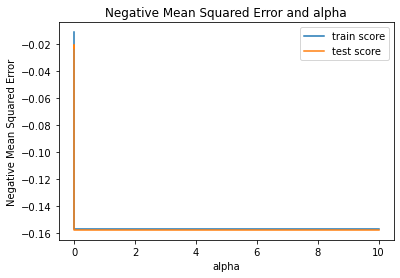

In [264]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title("Negative Mean Squared Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

 Fine tuning with values for alpha.

In [265]:
params = {'alpha': [0.0001,0.00015,0.001,0.0015,0.01]} 

lasso = Lasso()

# cross validation
folds = 5
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                       # scoring= 'neg_mean_absolute_error',  
                        scoring = 'neg_mean_squared_error',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.00015, 0.001, 0.0015, 0.01]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [266]:
#Printing the best hyperparameter alpha
print(model_cv1.best_params_)

{'alpha': 0.001}


The best value of regularisation parameter is 0.001 only.

In [267]:
#Fitting lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.09131202, -0.        ,  0.        ,  0.55606587,  0.20662717,
        0.02529264,  0.06644172,  0.        ,  0.00120685,  0.        ,
        0.11450269,  0.        ,  0.08550905,  0.        ,  0.        ,
        0.        ,  0.        ,  0.0356613 ,  0.06200437,  0.        ,
        0.        , -0.        ,  0.87581335,  0.1344603 ,  0.        ,
        0.099952  ,  0.03544148,  0.        , -0.        ,  0.07555316,
        0.16086819,  0.        ,  0.        ,  0.23530789,  0.01036266,
        0.        ,  0.        ,  0.05061434,  0.        ,  0.        ,
        0.01268602, -0.        , -0.        , -0.01051359,  0.00452941,
       -0.        , -0.00158829,  0.        ,  0.03051901,  0.00460905,
       -0.        , -0.        ,  0.07740413, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.00147193,  0.        ,
       -0.00450735,  0.00704278, -0.00900272,  0.        , -0.        ,
        0.00695245, -0.05570459, -0.01019149, -0.        ,  0.  

Lasso has turned many feature coefficcients to zero. This will help to retain only relevant features

In [268]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_score:',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_score:',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('ssr_train_score:',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('ssr_test_score:',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_score:',mse_train_lr)
metric3.append(mse_train_lr**0.5)
print('rmse_train_score:',mse_train_lr**0.5)


mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_score:',mse_test_lr)
metric3.append(mse_test_lr**0.5)
print('rmse_test_score:',mse_test_lr**0.5)


r2_train_score: 0.8991939836932257
r2_test_score: 0.883210291320583
ssr_train_score: 16.17376051138845
ssr_test_score: 8.450165974533206
mse_train_score: 0.015841097464631197
rmse_train_score: 0.12586142166935504
mse_test_score: 0.019248669645861517
rmse_test_score: 0.1387395749087531


Lasso regression is showing similar performance in the case of both train and test. This is a model that's least overfit. Another point to note here is We have got similar rmse score for ridge and lasso regression

In [269]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric1
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.699353e-01          0.914108          0.899194
1   R2 Score (Test)      -2.789798e+24          0.885680          0.883210
2       RSS (Train)       2.086816e+01         13.780945         16.173761
3        RSS (Test)       2.018522e+26          8.271464          8.450166
4      RMSE (Train)       1.429648e-01          0.116179          0.125861
5       RMSE (Test)       6.780855e+11          0.137265          0.138740

Inferences:
- According to the metrics values Ridge regression performs the best based on RMSE values and r2 score.
- Lasso gives very similar result in both train and test. It is the least overfit model.

I am choosing Lasso model over ridge here because of two reasons.
1. As Lasso regression model gives similar performance for both train and test data, it will perform well for unseen data compared to Ridge regression model.
2. There are many variables present in the dataset. So to improve efficiency and reduce multicollinearity, it's better to select lasso model as it also helps us in feature selection.

#### Get coefficients after regularization and find significant variables in predicting house SalePrice 

In [270]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

In [271]:
betas['Linear'] = lm1.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [272]:
betas.head()

Linear     Ridge     Lasso
MSSubClass  -0.097681 -0.073292 -0.091312
LotFrontage -0.249018 -0.010138 -0.000000
LotArea      0.545793  0.095541  0.000000
OverallQual  0.472748  0.338798  0.556066
OverallCond  0.201946  0.186873  0.206627

In [273]:
# Check features for which Lasso turned coefficients to zero 
feature_leastimp = betas[betas.Lasso==0]
feature_leastimp.index

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'ExterCond', 'BsmtCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Neighborhood_CollgCr', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_SWISU',
       'Neighborhood_SawyerW', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'PavedDrive_P'],
      dtype='object', length=131)

In [274]:
print(X_train.shape)
feature_leastimp.shape

(1021, 206)


(131, 3)

In [275]:
206-131

75

Lasso has  helped to select only relevant features by making coefficients of 131 features to zero.Only 75 features are important accordinf to Lasso regression. At the same time ridge has made those coefficient values to be very small.

In [276]:
# Store absolute values of model coefficients in new variable
betas['abs_lasso'] = np.absolute(betas.Lasso)
betas['abs_Linear'] = np.absolute(betas.Linear)
betas['abs_Ridge'] = np.absolute(betas.Ridge)
betas.head()

Linear     Ridge     Lasso  abs_lasso  abs_Linear  abs_Ridge
MSSubClass  -0.097681 -0.073292 -0.091312   0.091312    0.097681   0.073292
LotFrontage -0.249018 -0.010138 -0.000000   0.000000    0.249018   0.010138
LotArea      0.545793  0.095541  0.000000   0.000000    0.545793   0.095541
OverallQual  0.472748  0.338798  0.556066   0.556066    0.472748   0.338798
OverallCond  0.201946  0.186873  0.206627   0.206627    0.201946   0.186873

In [277]:
# Check the most important features according to lasso 
lasso_best20 = betas.sort_values(by='abs_lasso',ascending = False).head(20)
lasso_best20['Lasso']

GrLivArea               0.875813
OverallQual             0.556066
GarageCars              0.235308
OverallCond             0.206627
TotRmsAbvGrd            0.160868
BsmtFullBath            0.134460
BsmtQual                0.114503
Neighborhood_Somerst    0.109637
Neighborhood_Crawfor    0.108117
FullBath                0.099952
Neighborhood_NridgHt    0.099265
MSSubClass             -0.091312
BsmtExposure            0.085509
Exterior1st_BrkFace     0.077404
KitchenQual             0.075553
Neighborhood_NoRidge    0.073257
Neighborhood_Edwards   -0.068086
Neighborhood_IDOTRR    -0.066492
YearRemodAdd            0.066442
MSZoning_RL             0.062796
Name: Lasso, dtype: float64

In [278]:
# Check the most important features according to ridge 
ridge_best20 = betas.sort_values(by='abs_Ridge',ascending = False).head(20)
ridge_best20['Ridge']

OverallQual             0.338798
GrLivArea               0.241176
1stFlrSF                0.207254
TotRmsAbvGrd            0.190735
OverallCond             0.186873
2ndFlrSF                0.174103
GarageCars              0.153189
FullBath                0.144162
Neighborhood_Crawfor    0.134145
BsmtFullBath            0.127129
GarageArea              0.116636
Neighborhood_NridgHt    0.115105
BsmtQual                0.110567
Neighborhood_MeadowV   -0.108025
Neighborhood_IDOTRR    -0.107160
Neighborhood_StoneBr    0.106997
MSZoning_RL             0.104388
SaleType_ConLD          0.097422
BedroomAbvGr            0.096656
LotArea                 0.095541
Name: Ridge, dtype: float64

###### Most important variables in predicting house price are given below in order based on their coefficient values

In [279]:
print(lasso_best20['Lasso'])

GrLivArea               0.875813
OverallQual             0.556066
GarageCars              0.235308
OverallCond             0.206627
TotRmsAbvGrd            0.160868
BsmtFullBath            0.134460
BsmtQual                0.114503
Neighborhood_Somerst    0.109637
Neighborhood_Crawfor    0.108117
FullBath                0.099952
Neighborhood_NridgHt    0.099265
MSSubClass             -0.091312
BsmtExposure            0.085509
Exterior1st_BrkFace     0.077404
KitchenQual             0.075553
Neighborhood_NoRidge    0.073257
Neighborhood_Edwards   -0.068086
Neighborhood_IDOTRR    -0.066492
YearRemodAdd            0.066442
MSZoning_RL             0.062796
Name: Lasso, dtype: float64


## Step4: Subjective questions

##### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


Optimal values are given below.
- ridge - 4.6
- lasso - 0.001

In [280]:
# Doubling the value of alpha to check model performance for ridge

alpha = 9.2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#print(ridge.coef_)

# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_score:',r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_score:',r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('ssr_train_score:',rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('ssr_test_score:',rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_score:',mse_train_lr)
metric4.append(mse_train_lr**0.5)
print('rmse_train_score:',mse_train_lr**0.5)


mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_score:',mse_test_lr)
metric4.append(mse_test_lr**0.5)
print('rmse_test_score:',mse_test_lr**0.5)


r2_train_score: 0.9056290816183943
r2_test_score: 0.8799439270227251
ssr_train_score: 15.141285104441781
ssr_test_score: 8.686499473111867
mse_train_score: 0.014829858084663841
rmse_train_score: 0.12177790474738774
mse_test_score: 0.01978701474512954
rmse_test_score: 0.14066632413313976


In [281]:
# Doubling the value of alpha to check model performance for lasso
alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_score:',r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_score:',r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('ssr_train_score:',rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('ssr_test_score:',rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_score:',mse_train_lr)
metric5.append(mse_train_lr**0.5)
print('rmse_train_score:',mse_train_lr**0.5)


mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_score:',mse_test_lr)
metric5.append(mse_test_lr**0.5)
print('rmse_test_score:',mse_test_lr**0.5)



r2_train_score: 0.8835483513533816
r2_test_score: 0.8695440658219177
ssr_train_score: 18.684014559557472
ssr_test_score: 9.438967770641053
mse_train_score: 0.018299720430516624
rmse_train_score: 0.1352764592621962
mse_test_score: 0.021501065536767776
rmse_test_score: 0.1466324163913552


In [282]:
final_metric['dob_Ridge Regression'] = pd.Series(metric4)
final_metric['dob_Lasso Regression'] = pd.Series(metric5)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression  \
0  R2 Score (Train)       8.699353e-01          0.914108          0.899194   
1   R2 Score (Test)      -2.789798e+24          0.885680          0.883210   
2       RSS (Train)       2.086816e+01         13.780945         16.173761   
3        RSS (Test)       2.018522e+26          8.271464          8.450166   
4      RMSE (Train)       1.429648e-01          0.116179          0.125861   
5       RMSE (Test)       6.780855e+11          0.137265          0.138740   

   dob_Ridge Regression  dob_Lasso Regression  
0              0.905629              0.883548  
1              0.879944              0.869544  
2             15.141285             18.684015  
3              8.686499              9.438968  
4              0.121778              0.135276  
5              0.140666              0.146632

- After doubling the alpha values, there is no considerable change in the performance of models. There is a slight increase in the rmse scores for both ridge and lasso.2.4% increase in case of ridge and 5% increase in the cas of Lasso.
- Also the r2 scores have been slighlty reduced after doubling alpha values.  

###### Find new important features after doubling alpha values

In [283]:
betas['dob_Ridge'] = ridge.coef_
betas['dob_Lasso'] = lasso.coef_

In [284]:
betas['abs_dobridge'] = np.absolute(betas['dob_Ridge'])
betas['abs_doblasso'] = np.absolute(betas['dob_Lasso'])

In [285]:
betas.head()

Linear     Ridge     Lasso  abs_lasso  abs_Linear  abs_Ridge  \
MSSubClass  -0.097681 -0.073292 -0.091312   0.091312    0.097681   0.073292   
LotFrontage -0.249018 -0.010138 -0.000000   0.000000    0.249018   0.010138   
LotArea      0.545793  0.095541  0.000000   0.000000    0.545793   0.095541   
OverallQual  0.472748  0.338798  0.556066   0.556066    0.472748   0.338798   
OverallCond  0.201946  0.186873  0.206627   0.206627    0.201946   0.186873   

             dob_Ridge  dob_Lasso  abs_dobridge  abs_doblasso  
MSSubClass   -0.068495  -0.072380      0.068495      0.072380  
LotFrontage   0.009435   0.000000      0.009435      0.000000  
LotArea       0.063722   0.000000      0.063722      0.000000  
OverallQual   0.276022   0.580268      0.276022      0.580268  
OverallCond   0.150469   0.121368      0.150469      0.121368

In [286]:
# Dataframe with top model coefficients for lasso using alpha = 0.001 and 0.002
lasso_best =pd.DataFrame({'var_alpha 0.001':list(lasso_best20.index),'coef_alpha 0.001':list(lasso_best20['Lasso'].values),
                         'var_alpha 0.002':list(betas.sort_values(by='abs_doblasso',ascending=False).head(20).index),
                         'coef_alpha 0.002':list(betas.sort_values(by='abs_doblasso',ascending=False).head(20)['dob_Lasso'].values)}
                        )

In [287]:
lasso_best

var_alpha 0.001  coef_alpha 0.001       var_alpha 0.002  \
0              GrLivArea          0.875813             GrLivArea   
1            OverallQual          0.556066           OverallQual   
2             GarageCars          0.235308            GarageCars   
3            OverallCond          0.206627          TotRmsAbvGrd   
4           TotRmsAbvGrd          0.160868           OverallCond   
5           BsmtFullBath          0.134460              BsmtQual   
6               BsmtQual          0.114503          BsmtFullBath   
7   Neighborhood_Somerst          0.109637           KitchenQual   
8   Neighborhood_Crawfor          0.108117          BsmtExposure   
9               FullBath          0.099952          YearRemodAdd   
10  Neighborhood_NridgHt          0.099265              FullBath   
11            MSSubClass         -0.091312  Neighborhood_Somerst   
12          BsmtExposure          0.085509  Neighborhood_Crawfor   
13   Exterior1st_BrkFace          0.077404            MSSubClass   
14           KitchenQual          0.075553            CentralAir   
15  Neighborhood_NoRidge          0.073257      FireplaceQu_None   
16  Neighborhood_Edwards         -0.068086  Neighborhood_NridgHt   
17   Neighborhood_IDOTRR         -0.066492           MSZoning_RL   
18          YearRemodAdd          0.066442  Neighborhood_Edwards   
19           MSZoning_RL          0.062796  Neighborhood_NoRidge   

    coef_alpha 0.002  
0           0.720777  
1           0.580268  
2           0.243271  
3           0.171964  
4           0.121368  
5           0.114540  
6           0.096038  
7           0.095373  
8           0.086853  
9           0.086750  
10          0.084448  
11          0.073052  
12          0.072825  
13         -0.072380  
14          0.072090  
15         -0.068599  
16          0.060360  
17          0.056980  
18         -0.056338  
19          0.053094

In [288]:
# Dataframe with top model coefficients for ridge using alpha = 4.6 and 9.2
ridge_best =pd.DataFrame({'var_alpha 4.6':list(ridge_best20.index),'coef_alpha 4.6':list(ridge_best20['Ridge'].values),
                         'var_alpha 9.2':list(betas.sort_values(by='abs_dobridge',ascending=False).head(20).index),
                         'coef_alpha 9.2':list(betas.sort_values(by='abs_dobridge',ascending=False).head(20)['dob_Ridge'].values)}
                        )
ridge_best

var_alpha 4.6  coef_alpha 4.6         var_alpha 9.2  coef_alpha 9.2
0            OverallQual        0.338798           OverallQual        0.276022
1              GrLivArea        0.241176             GrLivArea        0.195338
2               1stFlrSF        0.207254          TotRmsAbvGrd        0.178962
3           TotRmsAbvGrd        0.190735              1stFlrSF        0.163765
4            OverallCond        0.186873           OverallCond        0.150469
5               2ndFlrSF        0.174103              2ndFlrSF        0.148792
6             GarageCars        0.153189              FullBath        0.141321
7               FullBath        0.144162            GarageCars        0.136940
8   Neighborhood_Crawfor        0.134145  Neighborhood_Crawfor        0.118973
9           BsmtFullBath        0.127129            GarageArea        0.115250
10            GarageArea        0.116636          BsmtFullBath        0.107986
11  Neighborhood_NridgHt        0.115105              BsmtQual        0.105152
12              BsmtQual        0.110567  Neighborhood_NridgHt        0.097848
13  Neighborhood_MeadowV       -0.108025           KitchenQual        0.093832
14   Neighborhood_IDOTRR       -0.107160   Neighborhood_IDOTRR       -0.093618
15  Neighborhood_StoneBr        0.106997  Neighborhood_NoRidge        0.090578
16           MSZoning_RL        0.104388          BsmtExposure        0.088216
17        SaleType_ConLD        0.097422          BedroomAbvGr        0.087544
18          BedroomAbvGr        0.096656  Neighborhood_Edwards       -0.087043
19               LotArea        0.095541          YearRemodAdd        0.083350

Eventhough there is a change in model coefficients, top variables are the same for both lasso and ridge after doubling optimum alpha value.

##### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [289]:
# Determine top 5 variables of lasso model
l_best = lasso_best['var_alpha 0.001'].head()
l_best

0       GrLivArea
1     OverallQual
2      GarageCars
3     OverallCond
4    TotRmsAbvGrd
Name: var_alpha 0.001, dtype: object

In [290]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
318     0.235294     0.236301  0.039403     0.666667        0.500   0.876812   
239     0.176471     0.106164  0.033981     0.555556        0.375   0.528986   
986     0.176471     0.130137  0.017931     0.555556        0.875   0.275362   
1416    1.000000     0.133562  0.046139     0.333333        0.625   0.094203   
390     0.176471     0.099315  0.032409     0.444444        0.875   0.202899   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
318       0.716667        0.16   0.666667   0.333333      0.75      0.75   
239       0.000000        0.00   0.333333   0.333333      0.50      0.50   
986       0.883333        0.00   0.333333   0.666667      0.50      0.50   
1416      0.000000        0.00   0.333333   0.333333      0.50      0.75   
390       0.000000        0.00   0.333333   0.333333      0.50      1.00   

      BsmtExposure  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
318           1.00    0.174876    0.000000   0.154110     0.220458        1.0   
239           0.25    0.016655    0.000000   0.274401     0.120295        0.6   
986           0.25    0.000000    0.000000   0.207620     0.079378        0.8   
1416          0.25    0.000000    0.000000   0.332620     0.127169        0.8   
390           0.25    0.042700    0.265265   0.098031     0.140917        1.0   

      CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
318            1  0.231481  0.616949           0.0   0.424289      0.333333   
239            1  0.098611  0.333656           0.0   0.201576      0.000000   
986            1  0.145602  0.307022           0.0   0.230015      0.000000   
1416           1  0.202315  0.505569           0.0   0.355880      0.000000   
390            1  0.136343  0.196610           0.0   0.178517      0.333333   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
318            0.0  0.666667       0.5         0.500           0.0   
239            0.0  0.333333       0.5         0.375           0.0   
986            0.0  0.333333       0.0         0.250           0.0   
1416           0.0  0.666667       0.0         0.500           0.5   
390            0.0  0.333333       0.0         0.500           0.0   

      KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
318      0.666667      0.545455    0.333333     0.845455        0.75   
239      0.333333      0.363636    0.333333     0.445455        0.25   
986      0.666667      0.181818    0.000000     0.454545        0.25   
1416     0.333333      0.727273    0.000000     0.645455        0.50   
390      0.333333      0.363636    0.000000     0.709091        0.25   

      GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  \
318     0.462623         0.6         0.6    0.396733     0.114723   
239     0.155148         0.6         0.6    0.000000     0.267686   
986     0.179831         0.4         0.6    0.459743     0.000000   
1416    0.394922         0.6         0.6    0.000000     0.000000   
390     0.270804         0.6         0.6    0.000000     0.248566   

      EnclosedPorch  ScreenPorch  MiscVal    MoSold  YrSold  LotShape_IR2  \
318        0.260870          0.0      0.0  0.272727    0.75             0   
239        0.000000          0.0      0.0  0.272727    1.00             0   
986        0.000000          0.0      0.0  0.454545    0.00             0   
1416       0.206522          0.0      0.0  0.272727    1.00             0   
390        0.202899          0.0      0.0  0.272727    0.50             0   

      ...  GarageType_Detchd  GarageType_None  LotConfig_CulDSac  \
318   ...                  0                0                  0   
239   ...                  1                0                  0   
986   ...                  0                0                  0   
1416  ...                  1                0                  0   
390   ...                  1      

In [291]:
# Remove top5 features from  X_train and X_test
X_train_mod = X_train.drop(labels=l_best,axis=1)
X_test_mod = X_test.drop(labels=l_best,axis=1)

In [292]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                       # scoring= 'neg_mean_absolute_error',  
                        scoring = 'neg_mean_squared_error',
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_mod, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [293]:
#Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [294]:
#Fitting Lasso model for alpha = 0.001
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_mod, y_train)


Lasso(alpha=0.001)

In [295]:
lasso_newcoef = pd.DataFrame({'features':X_test_mod.columns,'coef':lasso.coef_})
lasso_newcoef.head()

features      coef
0    MSSubClass -0.079132
1   LotFrontage -0.000000
2       LotArea  0.000000
3     YearBuilt  0.000000
4  YearRemodAdd  0.114418

In [296]:
lasso_newcoef['abs_coef'] = np.absolute(lasso_newcoef.coef)
(lasso_newcoef.sort_values(by='abs_coef',ascending=False).head(5))

features      coef  abs_coef
17    1stFlrSF  0.910607  0.910607
18    2ndFlrSF  0.441136  0.441136
29  GarageArea  0.250775  0.250775
8     BsmtQual  0.183889  0.183889
22    FullBath  0.139431  0.139431

'1stFlrSF', '2ndFlrSF', 'GarageArea', 'BsmtQual', 'FullBath' are the new important features.